## Temperature Forecast Project using ML
Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [100]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

In [101]:
#To print all columns
pd.set_option('display.max_columns',None)

In [102]:
#importing the dataset using read_csv
df = pd.read_csv("temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896   0.161697   0.130928    0.000000    0.000000   
1      0.225508   0.251771   0.159444   0.127727    0.000000    0.000000   
2      0.209344   0.257469   0.204091   0.142125    0.000000    0.000000   
3      0.216372   0.226002   0.161157   0.134249    0.000000    0.000000   
4      0.151407   0.249995   0.178892   0.170021    0.000000    0.000000   
...         ...        ...        ...        ...         ...         ...   
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  212.3350  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8    

### Dataset Description
The data set includes information about:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
----------------------------------------------------  
In this problem, I have 2 target columns:
1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day minimum temperature

Also, target column data looks continuous. So I can conclude that this project is a **Regression problem**.

## EDA:

In [103]:
#Checking shape of dataset
df.shape

(7752, 25)

There are 7752 rows and 25 columns in my dataset.

In [104]:
#Checking all column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Above are the list if column names in the dataset.

In [105]:
#Checking the data types of all columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except Date all other columns are float type data.

In [106]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


I can observe in some columns of the dataset i have null values.

In [107]:
#Checking unique values of each column
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

Above are the unique value count of each column.

In [108]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64
****************************************
30-07-2017    25
11-08-2014    25
21-07-2017    25
20-07-2013    25
03-07-2016    25
              ..
23-08-2014    25
06-08-2014    25
07-07-2013    25
09-07-2013    25
29-08-2014    25
Name: Date, Length: 310, dtype: int64
****************************************
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64
****************************************
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_

Above are the value counts of each columns.In LDAPS_CC2 column, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 columns there are more zero values.

**I tried replacing zeros in LDAPS_PPT1, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 but the accuracy of the model reduced which means these zero inputs are important for model building so i'm keeping them as it is.**

In [109]:
#Checking null values in the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

I can see null values in all the columns except lat, lon, DEM, Slope, Solar radiation colums.And i can notice in station and Date column there are only two null values so let me have a look into unique count of those columns.

In [110]:
#lets check the unique values in station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [111]:
#lets check the unique values in Date column
df['Date'].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

So it looks like the data is collected for about 25 stations and the last 2 entries are nan values,so i can replace them with station 1 and 2 considering the entries of next day.And the nan value in Date column can be replaced by continuation of dates like 31-08-2017. 

In [112]:
# Lets replace the null values in station column
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [113]:
#lets replace null values in 'Date' column
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

# Feature Engineering:

In [114]:
df["Date"]=pd.to_datetime(df["Date"])

In [115]:
#Extracting Year, month and date from Date column
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

Succesfully extracted date, month and year from Date column.

In [116]:
#Printing dataset
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Year  Month  Day  
0       21.2  2013      6   30  
1       22.5  2013      6   30  
2       23.9  2013      6   30  
3       24.3  2013      6   30  
4       22.5  2013      6   30

After extraction i can drop Date column.

In [117]:
#Droping Date column
df = df.drop(["Date"],axis=1)

In [118]:
#Checking null values in the dataset
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64

So the nan values in station and Date column are replaced.Let me replace nan values in other columns. 

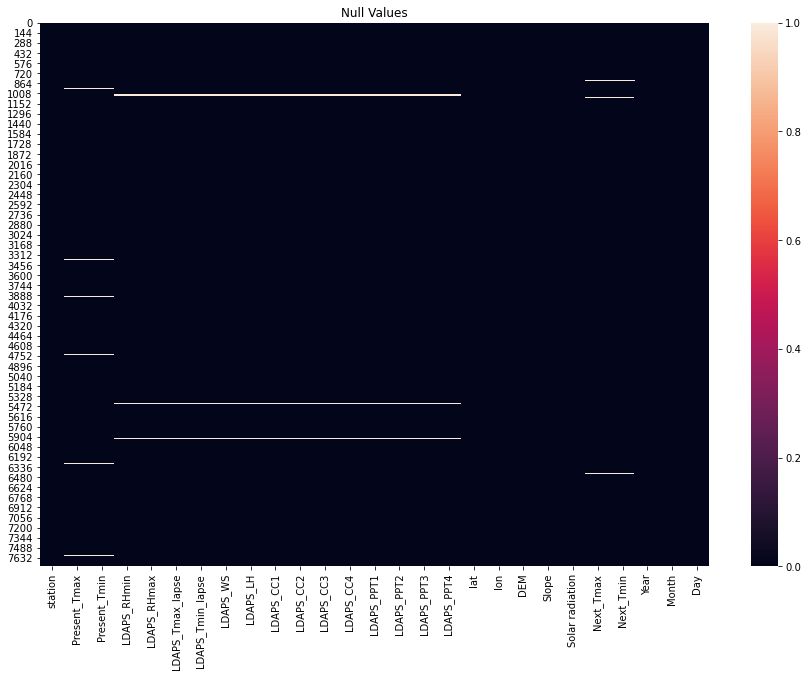

In [119]:
#Visualizeing null values
plt.figure(figsize=[15,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

I can see the null values clearly now.

# Imputaion method to replace nan values:

In [120]:
#Checking for skewness
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

In [121]:
#Replacing nan values in columns having skewness
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].median())
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].median())
df["LDAPS_WS"] = df["LDAPS_WS"].fillna(df["LDAPS_WS"].median())
df["LDAPS_LH"] = df["LDAPS_LH"].fillna(df["LDAPS_LH"].median())
df["LDAPS_CC3"] = df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].median())
df["LDAPS_CC4"] = df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].median())
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].median())
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].median())
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].median())
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].median())

In [122]:
#Replacing nan values in columns without skewness
df["Present_Tmax"] = df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"] = df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_CC1"] = df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"] = df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["Next_Tmax"] = df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"] = df["Next_Tmin"].fillna(df["Next_Tmin"].mean())

I have replaced all the nan values.

In [123]:
#Checking null values in the dataset again
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

Now all the null values has been replaced.

**If the column entries in the dataset are consecutive it will create problem while building the model so let me shuffel the data.**

In [124]:
#Shuffeling the dataset
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True)
df

index  station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       346     22.0          26.1          22.8    83.065186    95.191612   
1      4013     14.0          33.0          26.4    46.830036    79.996201   
2      6080      6.0          27.1          20.4    33.422142    72.815437   
3      6791     17.0          28.3          25.2    68.589859    91.336685   
4      7487     13.0          25.6          22.2    76.545097    91.547554   
...     ...      ...           ...           ...          ...          ...   
7747   1542     18.0          29.0          23.8    42.783684    80.941513   
7748   1848     24.0          32.8          23.1    72.076973    91.029938   
7749   7533      9.0          32.1          22.6    81.496338    93.035683   
7750    704      5.0          26.7          23.5    59.941174    96.970543   
7751   1539     15.0          28.7          22.9    41.655201    80.752937   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            27.251474         24.685189  8.841720   31.818141   0.917315   
1            33.907958         26.510417  5.723613   14.749409   0.186284   
2            28.988197         17.589862  8.887405   76.385808   0.000000   
3            30.647462         25.455428  4.450145   79.709979   0.215128   
4            28.182512         23.726057  9.010479   64.174354   0.717596   
...                ...               ...       ...         ...        ...   
7747         27.751136         21.898990  7.206173   95.900530   0.246897   
7748         26.718354         23.602854  7.495288   37.844048   0.099153   
7749         28.744403         24.293875  8.859239   53.055809   0.370772   
7750         30.584770         24.785452  7.989755  108.578660   0.532800   
7751         28.264206         21.706269  7.620666   33.686811   0.226876   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.760441   0.818959   0.633981    5.019426    0.543750    0.122976   
1      0.175566   0.085915   0.057989    0.000000    0.000000    0.000000   
2      0.000000   0.136258   0.469130    0.000000    0.000000    0.000000   
3      0.555954   0.272866   0.215679    0.000000    0.000000    0.000000   
4      0.641395   0.590216   0.481586    2.509215    0.182349    4.043334   
...         ...        ...        ...         ...         ...         ...   
7747   0.203669   0.330795   0.381633    0.000000    0.000000    0.000000   
7748   0.389387   0.574294   0.457443    0.000000    0.000000    0.000000   
7749   0.688684   0.694534   0.563468    0.000000    0.409053    0.000000   
7750   0.251443   0.141895   0.086940    3.163090    0.000000    0.000000   
7751   0.251895   0.212337   0.210292    0.000000    0.000000    0.000000   

      LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  \
0       0.000000  37.5102  127.086  21.9668  0.1332      5736.805176   
1       0.000000  37.4967  126.927  30.9680  0.6180      5287.500977   
2       0.000000  37.5102  127.042  54.6384  0.1457      4577.148926   
3       0.000000  37.6181  127.099  53.4712  0.6970      5598.242676   
4       0.000000  37.5776  127.083  59.8324  2.6865      4813.178711   
...          ...      ...      ...      ...     ...              ...   
7747    0.001283  37.4832  127.024  56.4448  1.2313      4435.611816   
7748    0.000000  37.5237  126.909  17.2956  0.2223      5758.557617   
7749    0.002765  37.4967  126.826  50.9312  0.4125      4774.966309   
7750    0.000000  37.5507  127.135  35.0380  0.5055      5483.246094   
7751    0.021948  37.5507  126.937  30.0464  0.8552      4470.393066   

      Next_Tmax  Next_Tmin  Year  Month  Day  
0          27.2       23.5  2013      7   13  
1          34.8       24.5  2015      5    8  
2          28.8       19.2  2016      8   26  
3          27.5       24.0  2017      7   23  
4          29.6       23.9  2017      8   20  
...         ...        ...   ...    ...  ...  
7747       30.5       21.

This is the dataset after shuffeling.

In [125]:
#lets drop the index column
df.drop(columns = 'index', inplace = True)

In [126]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0     22.0          26.1          22.8    83.065186    95.191612   
1     14.0          33.0          26.4    46.830036    79.996201   
2      6.0          27.1          20.4    33.422142    72.815437   
3     17.0          28.3          25.2    68.589859    91.336685   
4     13.0          25.6          22.2    76.545097    91.547554   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
0         27.251474         24.685189  8.841720  31.818141   0.917315   
1         33.907958         26.510417  5.723613  14.749409   0.186284   
2         28.988197         17.589862  8.887405  76.385808   0.000000   
3         30.647462         25.455428  4.450145  79.709979   0.215128   
4         28.182512         23.726057  9.010479  64.174354   0.717596   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.760441   0.818959   0.633981    5.019426    0.543750    0.122976   
1   0.175566   0.085915   0.057989    0.000000    0.000000    0.000000   
2   0.000000   0.136258   0.469130    0.000000    0.000000    0.000000   
3   0.555954   0.272866   0.215679    0.000000    0.000000    0.000000   
4   0.641395   0.590216   0.481586    2.509215    0.182349    4.043334   

   LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.5102  127.086  21.9668  0.1332      5736.805176       27.2   
1         0.0  37.4967  126.927  30.9680  0.6180      5287.500977       34.8   
2         0.0  37.5102  127.042  54.6384  0.1457      4577.148926       28.8   
3         0.0  37.6181  127.099  53.4712  0.6970      5598.242676       27.5   
4         0.0  37.5776  127.083  59.8324  2.6865      4813.178711       29.6   

   Next_Tmin  Year  Month  Day  
0       23.5  2013      7   13  
1       24.5  2015      5    8  
2       19.2  2016      8   26  
3       24.0  2017      7   23  
4       23.9  2017      8   20

In [127]:
#Checking for empty observations
df.loc[df['Next_Tmax'] == " "]

Empty DataFrame
Columns: [station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin, Year, Month, Day]
Index: []

There is no empty observation in Next_Tmax column.

In [128]:
#Checking for empty observations
df.loc[df['Next_Tmin'] == " "]

Empty DataFrame
Columns: [station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin, Year, Month, Day]
Index: []

There is no empty observation in Next_Tmax column.

In [129]:
#Checking description of data set
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.997033     29.768211     23.225059    56.759372    88.388529   
std       7.213007      2.956557      2.403036    14.596973     7.158471   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.793480   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.514984     7.092549    62.450457   
std            2.932898          2.334099     2.173913    33.571540   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.760199     6.547470    56.865482   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774     0.356080     0.317864     0.298499     0.586267   
std       0.261185     0.256810     0.249208     0.253211     1.937198   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.148321     0.142328     0.103100     0.082741     0.000000   
50%       0.320110     0.315667     0.262555     0.227664     0.000000   
75%       0.571696     0.554963     0.494007     0.497230     0.049122   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.480310     0.275508     0.266801    37.544722   126.991397   
std       1.754900     1.156495     1.200654     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.016748     0.007231     0.000000    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7752.000000  7752.000000      7752.000000  7752.000000  7752.000000   
mean     61.867972     1.257048      5341.502803    30.274887    22.932220   
std      54.279780     1.370444       429.158867     3.122557     2.483276   
min      12.370000     0.098475      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      4999.018555    28.200000    21.400000   
50%      45.716000     0.618000      5436.345215    30.500000    23.100000   
75%      59.832400     1.767800      5728.316406    32.600000    24.600000   
max     212.335000     5.178230      5992.895996    38.900000    29.800000   

              Year        Month          Day  
count  7752.000000  7752.000000  7752.000000  
mean   2015.000516     7.080882    16.374742  
std       1.414487     2.238124     8.243617  
min    2013.000000     1.000000     7.000000  
25%    2014.000000     7.000000     8.000000  
50%    2015.000000     7.000000    16.000000  
75%    2016.000000     8.000000    24.000000  
max    2017.000000    12.000000    31.000000

Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

# Visualization:

# Univariate Analysis:

In [130]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


There is no categorical column in the dataset.

In [131]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']


Above all are numerical columns so let me replace the nan values with median if there is skewness and mean if there is no skewness. 

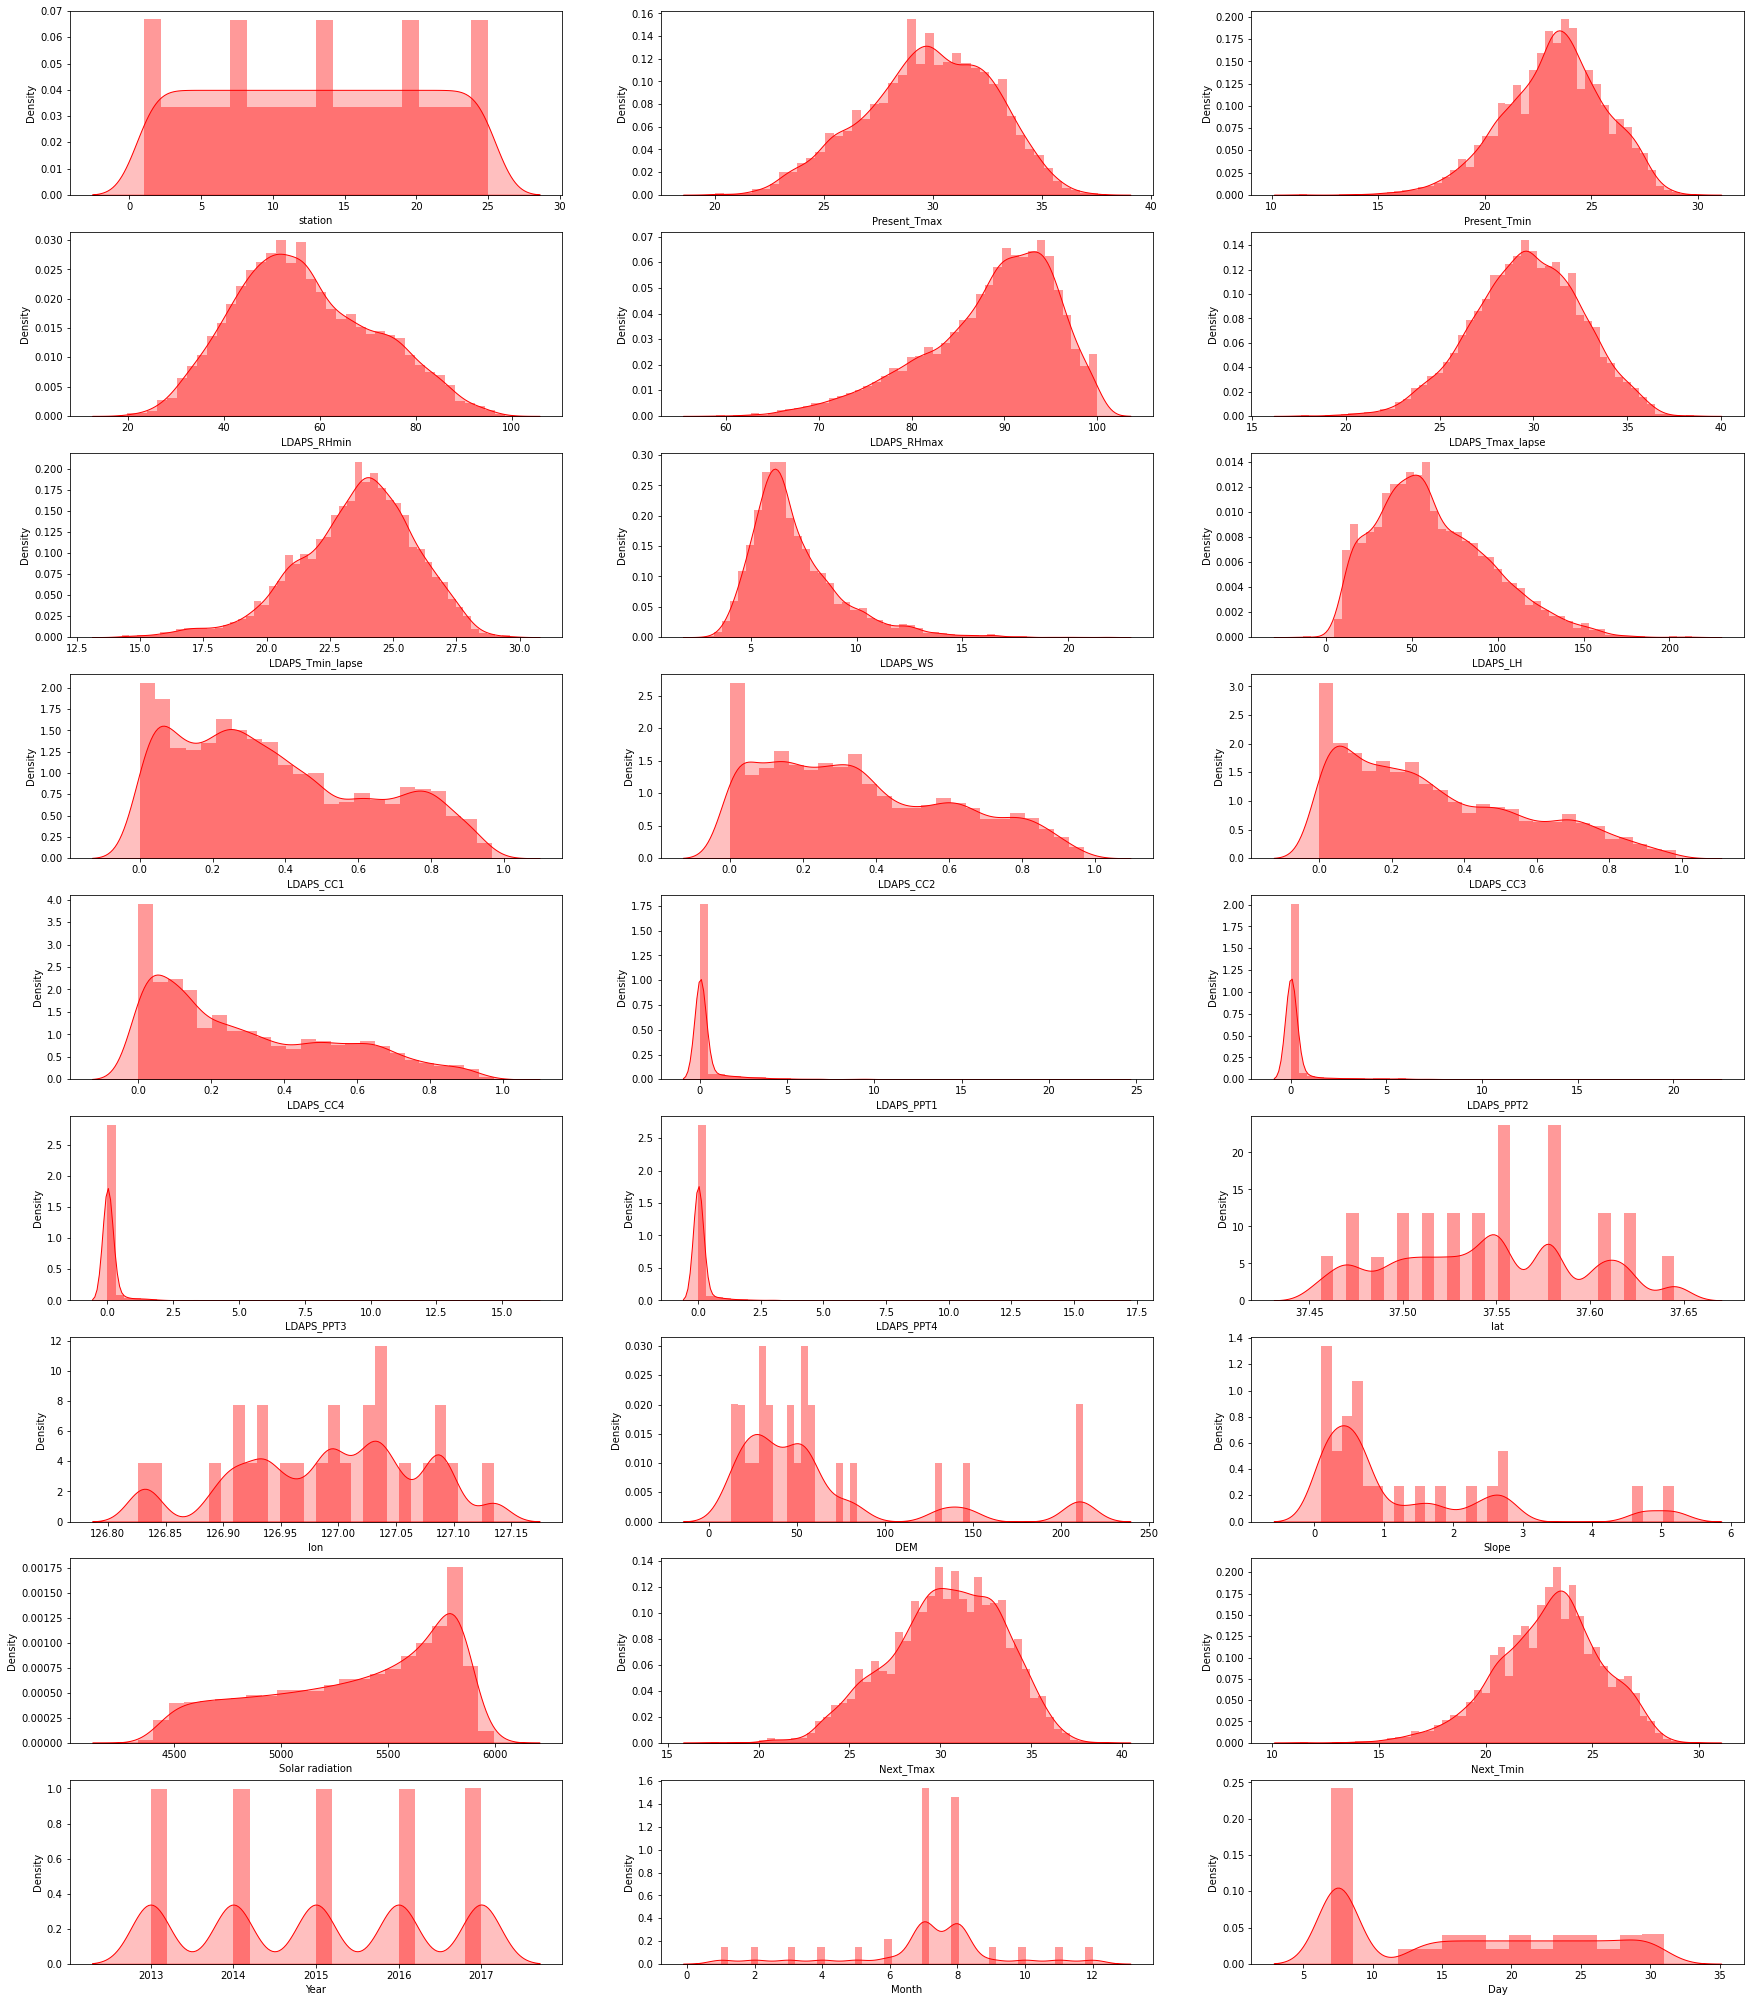

In [132]:
#Distribution plot for all numerical columns
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in df[numerical_columns]:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column],color='r',kde_kws={"shade": True},hist=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Above are the dist plots all the columns, I can observe there is skewness in most of the columns i have remove that.

# Bivariate Analysis:

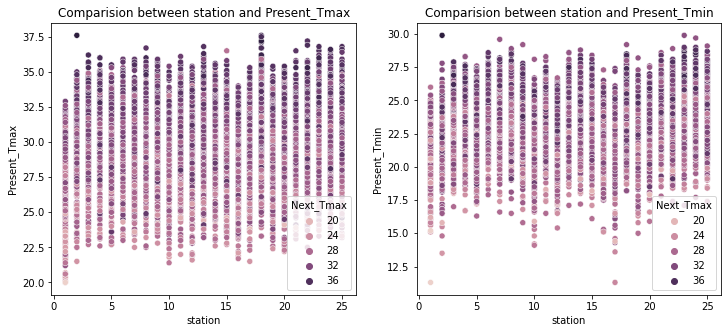

In [133]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.scatterplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.scatterplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmax']);
plt.show()

- In the above plot i can see that as the Present_Tmax is increasing the Next_Tmax is also increasing irrespective of station.
- And also in 2nd plot as Present_Tmin is increasing then Next_Tmax is also increasing.

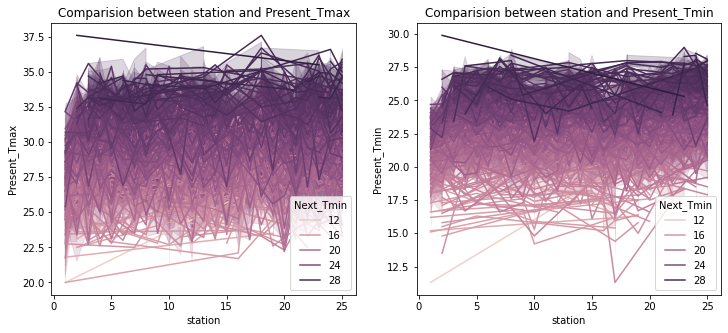

In [134]:
#Comparision between features using line plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.lineplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.lineplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmin']);
plt.show()

- The graph is almost irregular but I can observe dark purple color in the range of 30 to 35 in Present_Tmax and Present_Tmin which means Next_Tmin is more here in all the stations.

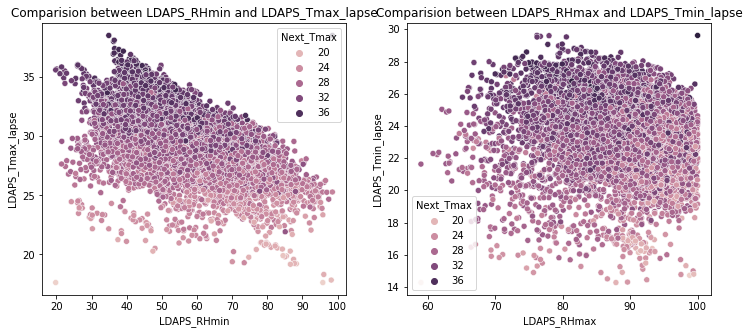

In [135]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_RHmin and LDAPS_Tmax_lapse')
sns.scatterplot(df['LDAPS_RHmin'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_RHmax and LDAPS_Tmin_lapse')
sns.scatterplot(df['LDAPS_RHmax'],df['LDAPS_Tmin_lapse'],hue=df['Next_Tmax']);
plt.show()

- In first plot i can observe a linear decrese in lapse with RHmin and also Next_Tmax is also decresing with the curve.
- In second plot no proper pattern is observed.

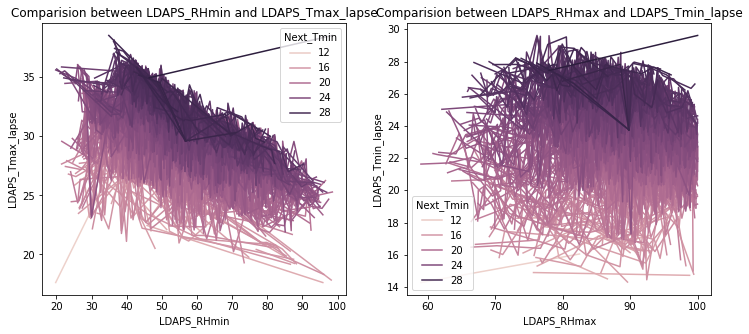

In [136]:
#Comparision between features using line plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_RHmin and LDAPS_Tmax_lapse')
sns.lineplot(df['LDAPS_RHmin'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_RHmax and LDAPS_Tmin_lapse')
sns.lineplot(df['LDAPS_RHmax'],df['LDAPS_Tmin_lapse'],hue=df['Next_Tmin']);
plt.show()

- In both the graphs there are some outliers.
- The color is getting dark as lapse and RHmax is incresing in 2nd graph.
- In first graph it is showing linear decreseing curve.

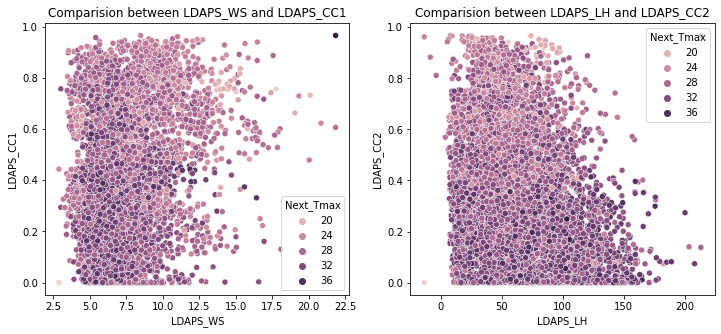

In [137]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_WS and LDAPS_CC1')
sns.scatterplot(df['LDAPS_WS'],df['LDAPS_CC1'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_LH and LDAPS_CC2')
sns.scatterplot(df['LDAPS_LH'],df['LDAPS_CC2'],hue=df['Next_Tmax']);
plt.show()

- In this perticular plot most of the points are lying between 5-10 LDAPS_WS and in LDAPS_LH 0-150.
- But no proper pattern is observed.

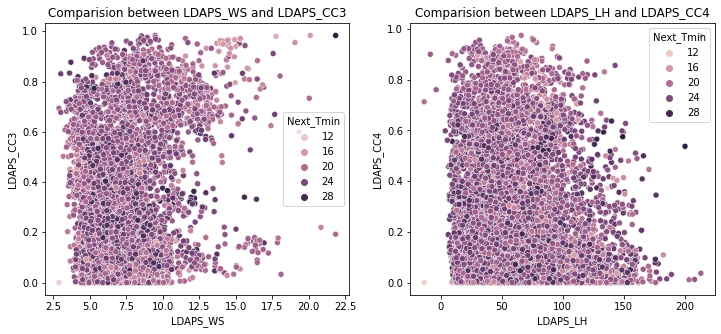

In [138]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_WS and LDAPS_CC3')
sns.scatterplot(df['LDAPS_WS'],df['LDAPS_CC3'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_LH and LDAPS_CC4')
sns.scatterplot(df['LDAPS_LH'],df['LDAPS_CC4'],hue=df['Next_Tmin']);
plt.show()

- In this perticular plot most of the points are lying between 5-10 LDAPS_WS and in LDAPS_LH 0-150.
- But no proper pattern is observed.

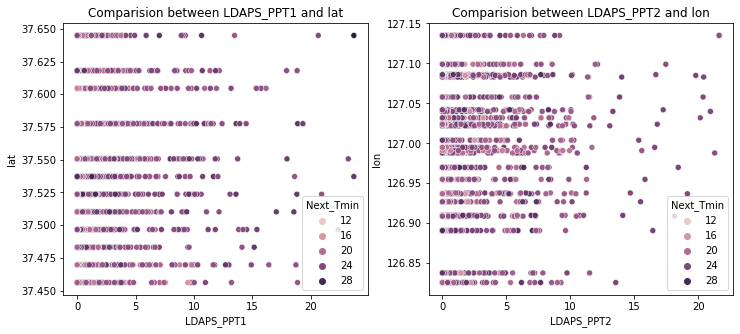

In [139]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_PPT1 and lat')
sns.scatterplot(df['LDAPS_PPT1'],df['lat'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_PPT2 and lon')
sns.scatterplot(df['LDAPS_PPT2'],df['lon'],hue=df['Next_Tmin']);
plt.show()

In this graph also i can not observe any patterens.

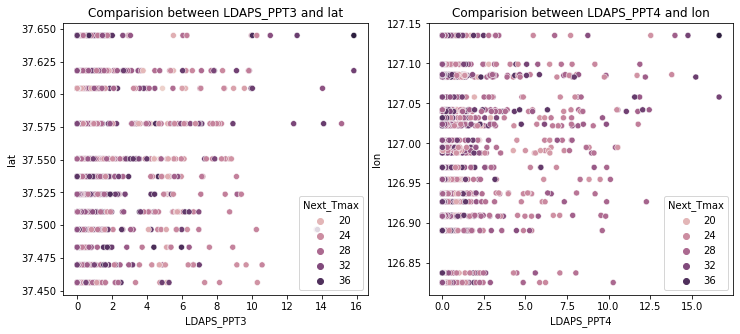

In [140]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_PPT3 and lat')
sns.scatterplot(df['LDAPS_PPT3'],df['lat'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_PPT4 and lon')
sns.scatterplot(df['LDAPS_PPT4'],df['lon'],hue=df['Next_Tmax']);
plt.show()

- I can say that lat and lon are just geometrical features they do not have any proper relationship with our features.

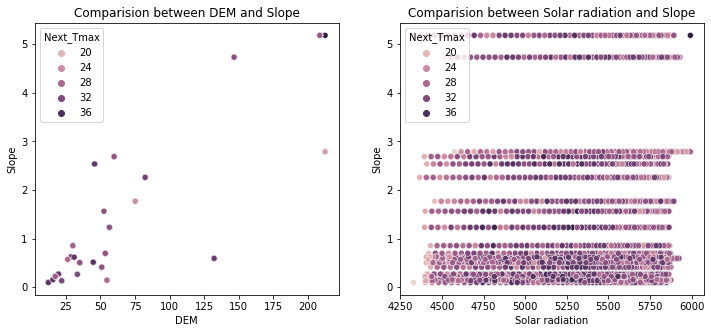

In [141]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between DEM and Slope')
sns.scatterplot(df['DEM'],df['Slope'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Solar radiation and Slope')
sns.scatterplot(df['Solar radiation'],df['Slope'],hue=df['Next_Tmax']);
plt.show()

- In first plot there is no patteren at all.
- In 2nd plot I can notice that there is no solar radiation in between the slope 3 to 4.5.

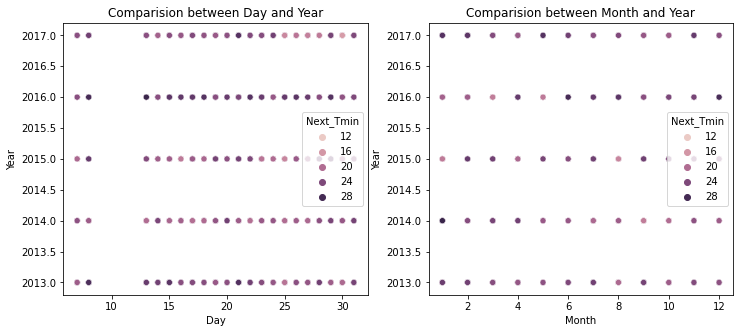

In [142]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between Day and Year')
sns.scatterplot(df['Day'],df['Year'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Month and Year')
sns.scatterplot(df['Month'],df['Year'],hue=df['Next_Tmin']);
plt.show()

- In first graph i can notice that 6 to 13 day there is no temperature noted.
- In second graph it looks setteled.

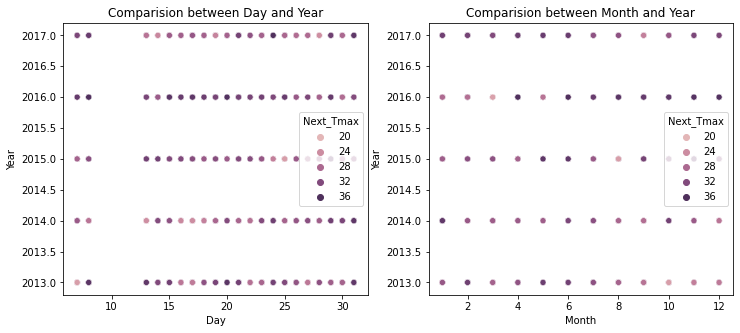

In [143]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between Day and Year')
sns.scatterplot(df['Day'],df['Year'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Month and Year')
sns.scatterplot(df['Month'],df['Year'],hue=df['Next_Tmax']);
plt.show()

- In first graph i can notice that 6 to 13 day there is no temperature noted.
- In second graph it looks setteled.

# Multivariate Analysis:

## Checking for outliers:

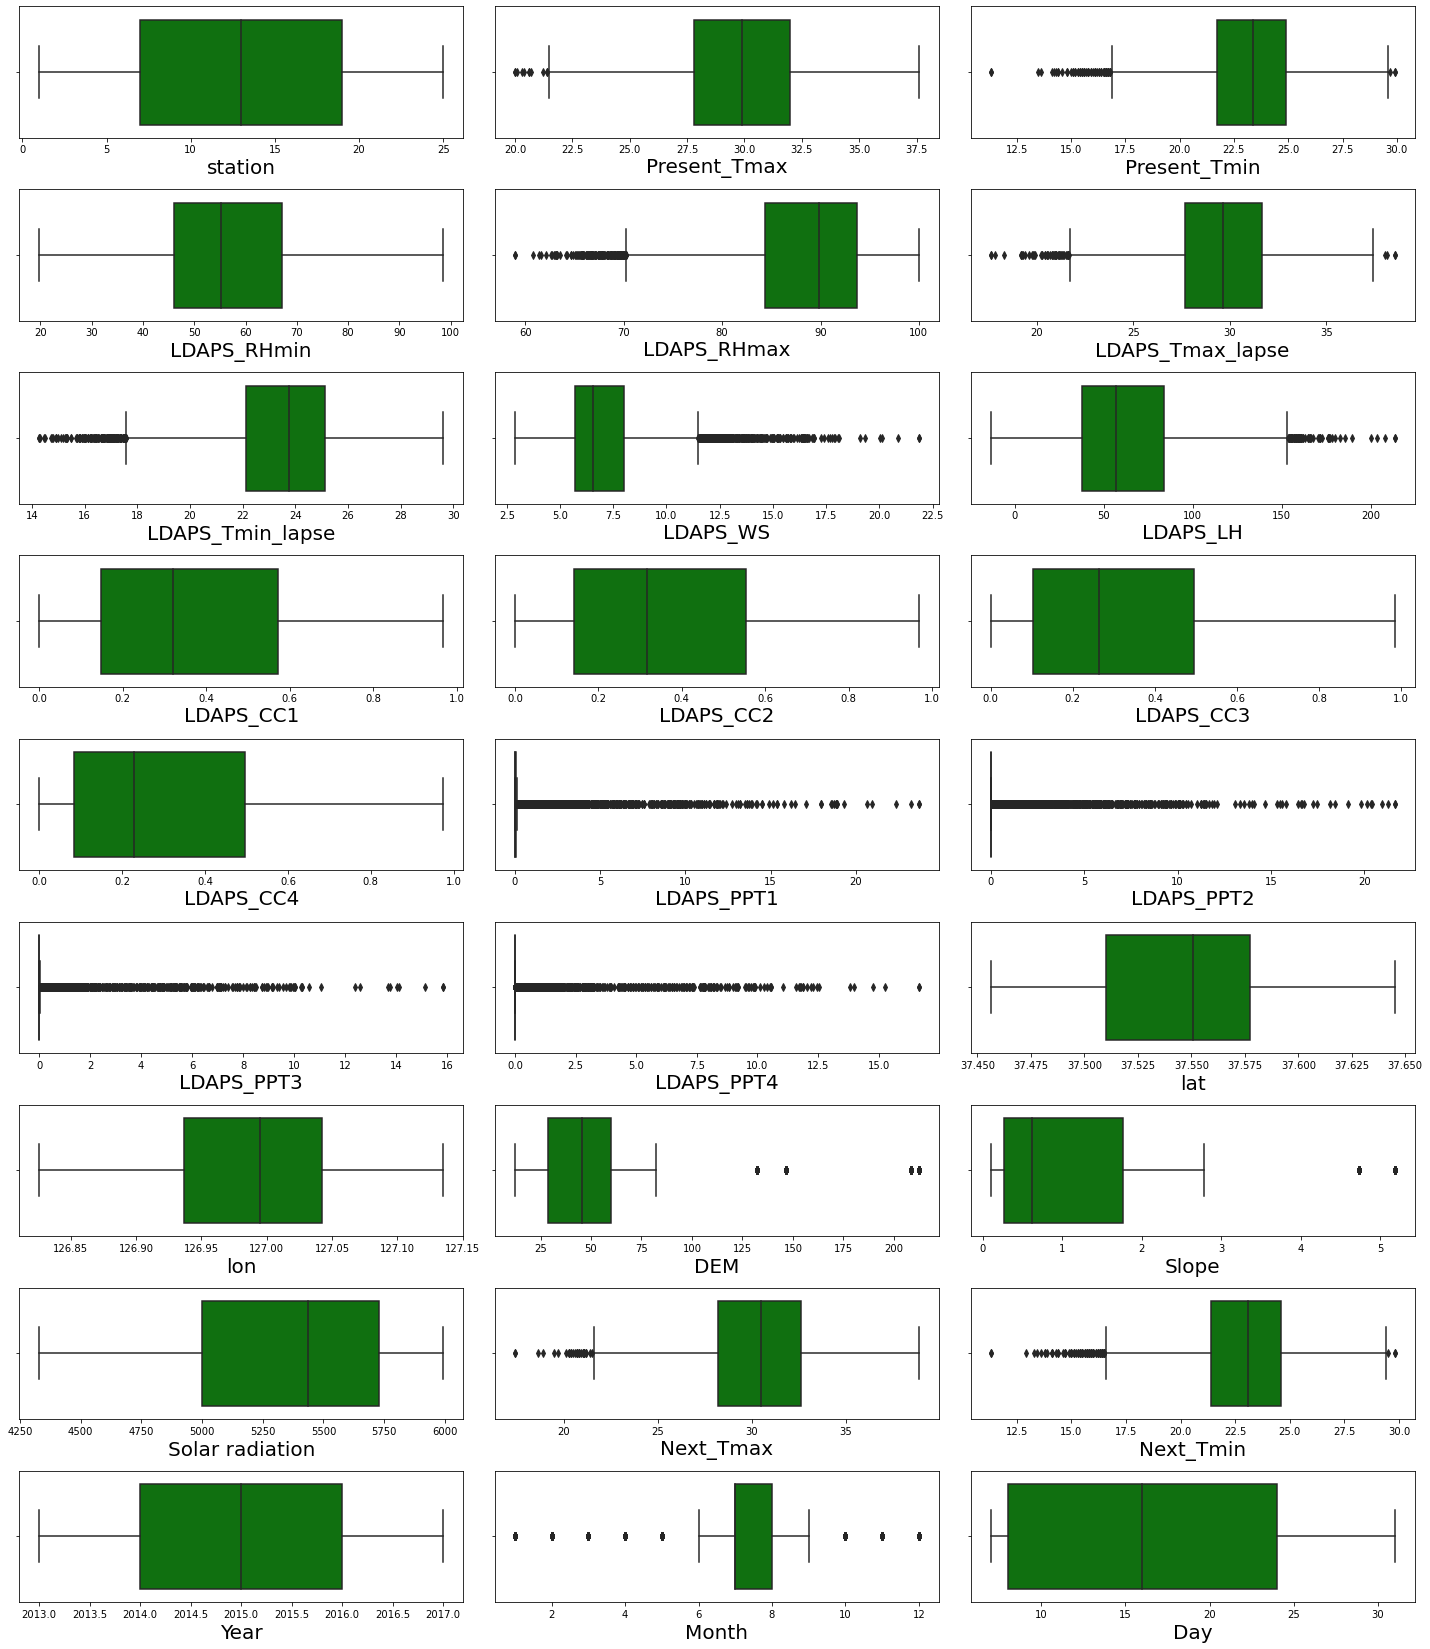

In [145]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in:
- Present_Tmax
- Present_Tmin
- LDAPS_RHmax
- LDAPS_Tmax_lapse
- LDAPS_Tmin_lapse
- LDAPS_WS
- LDAPS_LH
- LDAPS_PPT1
- LDAPS_PPT2
- LDAPS_PPT3
- LDAPS_PPT4
- DEM
- Slope
- Month
- Next_Tmax
- Next_Tmin


**But i should not remove outliers in target column.**

# Removing outliers:

# i) Zscore Method:

In [146]:
#Features having outliers
features=df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]

Above are the list of columns with outliers.

In [147]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0        22.0          26.1          22.8    83.065186    95.191612   
1        14.0          33.0          26.4    46.830036    79.996201   
2         6.0          27.1          20.4    33.422142    72.815437   
3        17.0          28.3          25.2    68.589859    91.336685   
5        15.0          23.8          20.6    39.880882    83.059052   
...       ...           ...           ...          ...          ...   
7747     18.0          29.0          23.8    42.783684    80.941513   
7748     24.0          32.8          23.1    72.076973    91.029938   
7749      9.0          32.1          22.6    81.496338    93.035683   
7750      5.0          26.7          23.5    59.941174    96.970543   
7751     15.0          28.7          22.9    41.655201    80.752937   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            27.251474         24.685189  8.841720   31.818141   0.917315   
1            33.907958         26.510417  5.723613   14.749409   0.186284   
2            28.988197         17.589862  8.887405   76.385808   0.000000   
3            30.647462         25.455428  4.450145   79.709979   0.215128   
5            31.378536         21.616987  5.432480   29.627446   0.388065   
...                ...               ...       ...         ...        ...   
7747         27.751136         21.898990  7.206173   95.900530   0.246897   
7748         26.718354         23.602854  7.495288   37.844048   0.099153   
7749         28.744403         24.293875  8.859239   53.055809   0.370772   
7750         30.584770         24.785452  7.989755  108.578660   0.532800   
7751         28.264206         21.706269  7.620666   33.686811   0.226876   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.760441   0.818959   0.633981    5.019426    0.543750    0.122976   
1      0.175566   0.085915   0.057989    0.000000    0.000000    0.000000   
2      0.000000   0.136258   0.469130    0.000000    0.000000    0.000000   
3      0.555954   0.272866   0.215679    0.000000    0.000000    0.000000   
5      0.220530   0.224890   0.089680    0.000000    0.000000    0.009309   
...         ...        ...        ...         ...         ...         ...   
7747   0.203669   0.330795   0.381633    0.000000    0.000000    0.000000   
7748   0.389387   0.574294   0.457443    0.000000    0.000000    0.000000   
7749   0.688684   0.694534   0.563468    0.000000    0.409053    0.000000   
7750   0.251443   0.141895   0.086940    3.163090    0.000000    0.000000   
7751   0.251895   0.212337   0.210292    0.000000    0.000000    0.000000   

      LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  \
0       0.000000  37.5102  127.086  21.9668  0.1332      5736.805176   
1       0.000000  37.4967  126.927  30.9680  0.6180      5287.500977   
2       0.000000  37.5102  127.042  54.6384  0.1457      4577.148926   
3       0.000000  37.6181  127.099  53.4712  0.6970      5598.242676   
5       0.000000  37.5507  126.937  30.0464  0.8552      5849.007324   
...          ...      ...      ...      ...     ...              ...   
7747    0.001283  37.4832  127.024  56.4448  1.2313      4435.611816   
7748    0.000000  37.5237  126.909  17.2956  0.2223      5758.557617   
7749    0.002765  37.4967  126.826  50.9312  0.4125      4774.966309   
7750    0.000000  37.5507  127.135  35.0380  0.5055      5483.246094   
7751    0.021948  37.5507  126.937  30.0464  0.8552      4470.393066   

      Next_Tmax  Next_Tmin  Year  Month  Day  
0          27.2       23.5  2013      7   13  
1          34.8       24.5  2015      5    8  
2          28.8       19.2  2016      8   26  
3          27.5       24.0  2017      7   23  
5          32.3       21.5  2014      3    7  
...         ...        ...   ...    ...  ...  
7747       30.5       21.1  2013      8   30  
7748       29.6       22.8  2014     11    7  
7749       30.7

I have removed the skewness using zscore method.

In [148]:
#Checking shape of new dataset
df_new.shape

(6907, 27)

In my new dataset i have 6907 rows and 27 columns.

In [149]:
#Checking shape of old dataset
df.shape

(7752, 27)

In my old dataset i was having 7752 rows and 27 columns.

In [150]:
#Checking dataloss in zscore method
Dataloss = (((7752-6907)/7752)*100)
Dataloss

10.900412796697626

Using zscore i'm getting 10.90% dataloss.So let me not remove any outliers from the dataset.But still let me have a look into IQR method also.

# ii) IQR method:

In [151]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [152]:
#Checking shape of new dataset
df_1.shape

(2413, 27)

In my new dataset i have 2413 rows and 27 columns.

In [153]:
#Checking shape of old dataset
df.shape

(7752, 27)

In my old dataset i was having 7752 rows and 27 columns.

In [154]:
#Checking dataloss in IQR
Dataloss = (((7752-2413)/7752)*100)
Dataloss

68.87254901960785

There is a huge dataloss in IQR method.So it is better not to remove any outliers.

# Checking the correlation using heat map:

In [155]:
cor=df.corr()

Checking correlation.

In [156]:
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112806      0.132122    -0.066731   
Present_Tmax      0.112806      1.000000      0.618760    -0.204571   
Present_Tmin      0.132122      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066731     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166334     -0.300322     -0.012754     0.579032   
LDAPS_Tmax_lapse  0.069363      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.105053      0.624216      0.764227     0.089471   
LDAPS_WS          0.004353     -0.123582     -0.037708     0.294271   
LDAPS_LH         -0.133693      0.134251     -0.011276    -0.070848   
LDAPS_CC1         0.006769     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003223     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000442     -0.145577     -0.005466     0.689513   
LDAPS_CC4         0.005849     -0.142683     -0.047714     0.513878   
LDAPS_PPT1       -0.004990     -0.111129      0.109121     0.262547   
LDAPS_PPT2       -0.010555     -0.101377      0.064829     0.390824   
LDAPS_PPT3       -0.015051     -0.122044     -0.049005     0.240576   
LDAPS_PPT4       -0.013033     -0.101178     -0.065647     0.168555   
lat              -0.237438     -0.052615     -0.078475     0.087099   
lon              -0.118574      0.009020     -0.043461    -0.076237   
DEM              -0.256095     -0.187121     -0.250275     0.102115   
Slope            -0.090413     -0.105809     -0.146339     0.123744   
Solar radiation  -0.018787     -0.025439      0.053578     0.244080   
Next_Tmax         0.108289      0.610348      0.471806    -0.437898   
Next_Tmin         0.128713      0.622741      0.796670     0.095019   
Year             -0.000582      0.059665      0.036987    -0.001984   
Month            -0.000169     -0.001185     -0.003550    -0.053922   
Day              -0.000730     -0.143899     -0.108728    -0.065735   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166334          0.069363          0.105053  0.004353   
Present_Tmax        -0.300322          0.570129          0.624216 -0.123582   
Present_Tmin        -0.012754          0.464151          0.764227 -0.037708   
LDAPS_RHmin          0.579032         -0.564580          0.089471  0.294271   
LDAPS_RHmax          1.000000         -0.373334         -0.113914  0.134786   
LDAPS_Tmax_lapse    -0.373334          1.000000          0.653985 -0.311900   
LDAPS_Tmin_lapse    -0.113914          0.653985          1.000000 -0.130245   
LDAPS_WS             0.134786         -0.311900         -0.130245  1.000000   
LDAPS_LH             0.238183          0.048004         -0.134906  0.007115   
LDAPS_CC1            0.436570         -0.438439          0.010900  0.289356   
LDAPS_CC2            0.391256         -0.523619          0.047725  0.261010   
LDAPS_CC3            0.226434         -0.541197         -0.044233  0.243402   
LDAPS_CC4            0.130008         -0.429374         -0.080587  0.221066   
LDAPS_PPT1           0.267698         -0.111016          0.037727  0.153213   
LDAPS_PPT2           0.228398         -0.242033          0.000588  0.192427   
LDAPS_PPT3           0.134087         -0.188063         -0.088791  0.162173   
LDAPS_PPT4           0.117376         -0.160235         -0.094855  0.144550   
lat                  0.195761         -0.042093         -0.096252  0.036646   
lon                  0.025662          0.090666         -0.026700 -0.059448   
DEM                  0.177134         -0.178895         -0.195445  0.190995   
Slope                0.219557         -0.162332         -0.185839  0.171577   
Solar radiation      0.148259          0.047971          0.159445  0.122966   
Next_Tmax           -0.281341          0.827189          0.588206 -0.345619   
Next_Tmin           -0.070246          0.586868          0.881059 -0.098767   
Year                -0.142223          0.015978        

Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

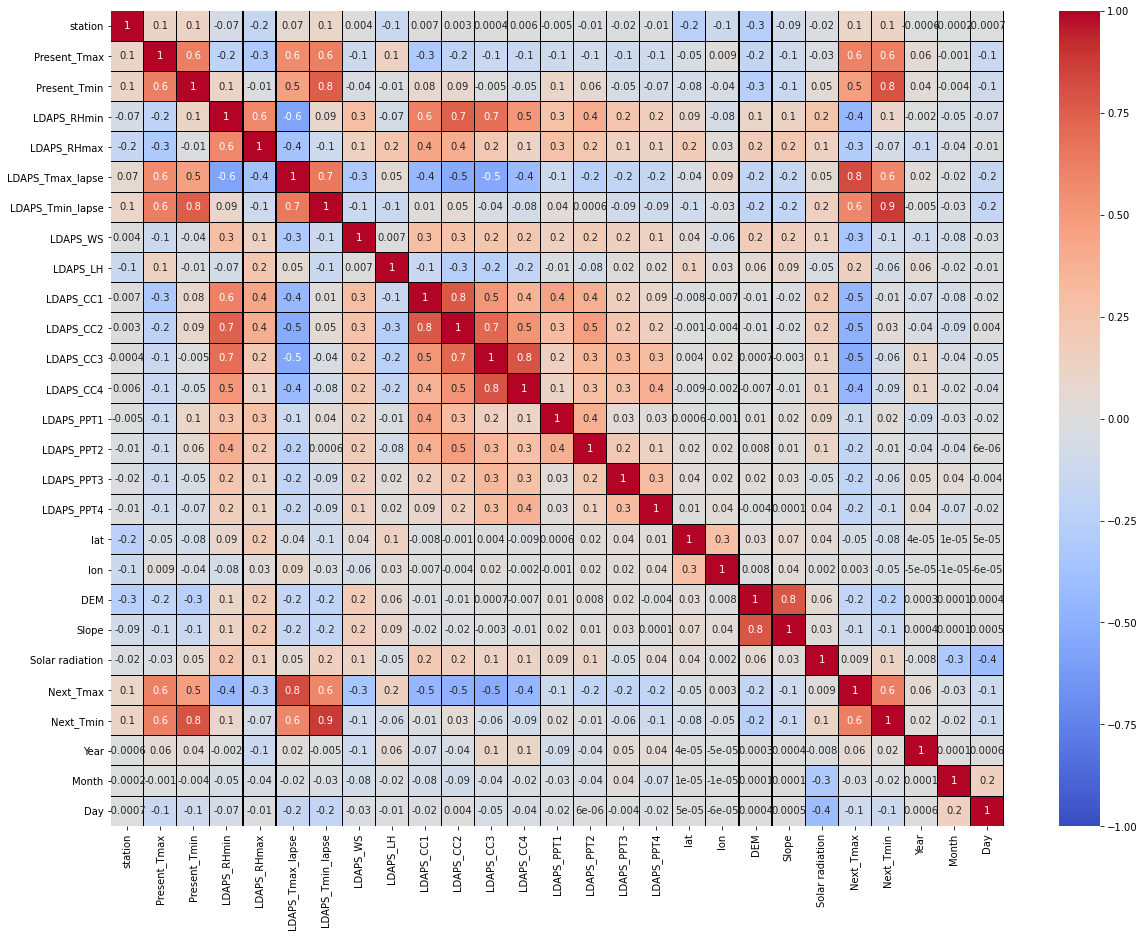

In [157]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

- By looking into the heat map i can say that there is multicolinearity issue.
- By looking into the correlation of target column with other features i can say that Next_Tmax has good correlation compared to Next_Tmin.
- **Let me plot a bar graph to get better insight on targets.**

# i) Prediction and model building for target Next_Tmax:

First let me consider Next_Tmax as target and build the model.

# Separating features and label:

In [158]:
x = df.drop("Next_Tmax",axis=1)
y = df["Next_Tmax"]

Assigned y as target variable and x as remaining features.

## Bar plot for correlations of Next_Tmax column with other features:

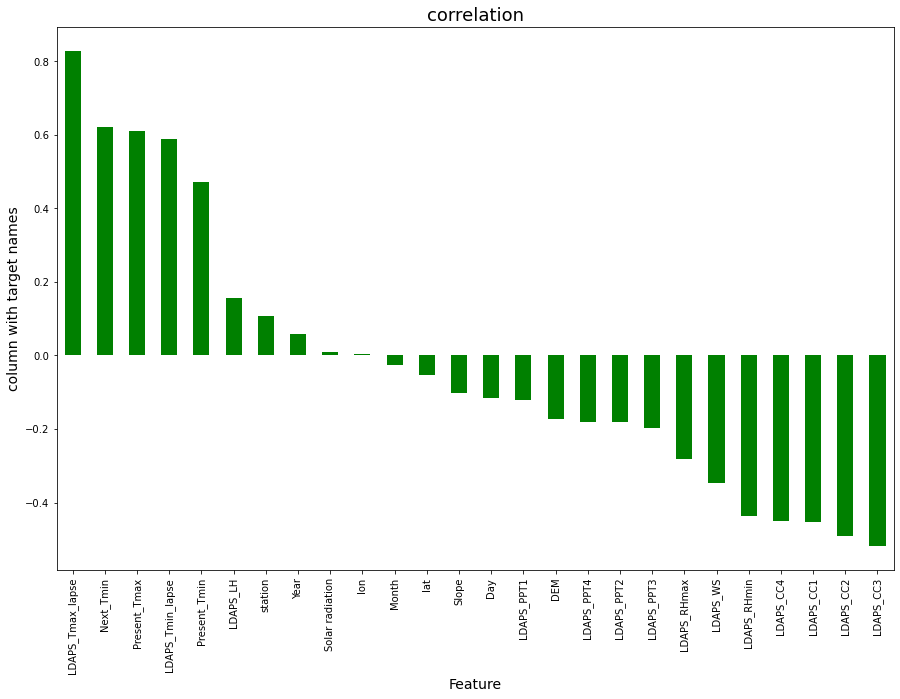

In [159]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

lon and Solar radiation has very less correlation with target Next_Tmax.

# Checking skewness:

In [160]:
#Checking for skewness
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmin          -0.404447
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

The skewed columns are:
- LDAPS_RHmax
- LDAPS_Tmin_lapse
- LDAPS_WS
- LDAPS_LH
- LDAPS_CC3
- LDAPS_CC4
- LDAPS_PPT1
- LDAPS_PPT2
- LDAPS_PPT3
- LDAPS_PPT4
- DEM
- Slope
- Solar radiation
- Month

# Removing skewness using yeo-johnson:

In [161]:
#list of skewed features
skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

Taking all the columns with skewness as a list with variable skew_fea.

In [162]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [163]:
#Removing skewness using yeo-johnson
x[skew_fea] = scaler.fit_transform(x[skew_fea].values)

Using yeo-johnson i have removed the skewness.

In [164]:
#Checking skewness after removing skewness
x[skew_fea].skew()

LDAPS_RHmax        -0.116481
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Month               0.043780
dtype: float64

The skewness has been reduced in all the columns.I have tried working on log, log1p, sqrt, cbrt and box-cox i found Yeo-johnson as best method in all the methods the skewness is not reducing at all.So i found Yeo-johnson as best method.

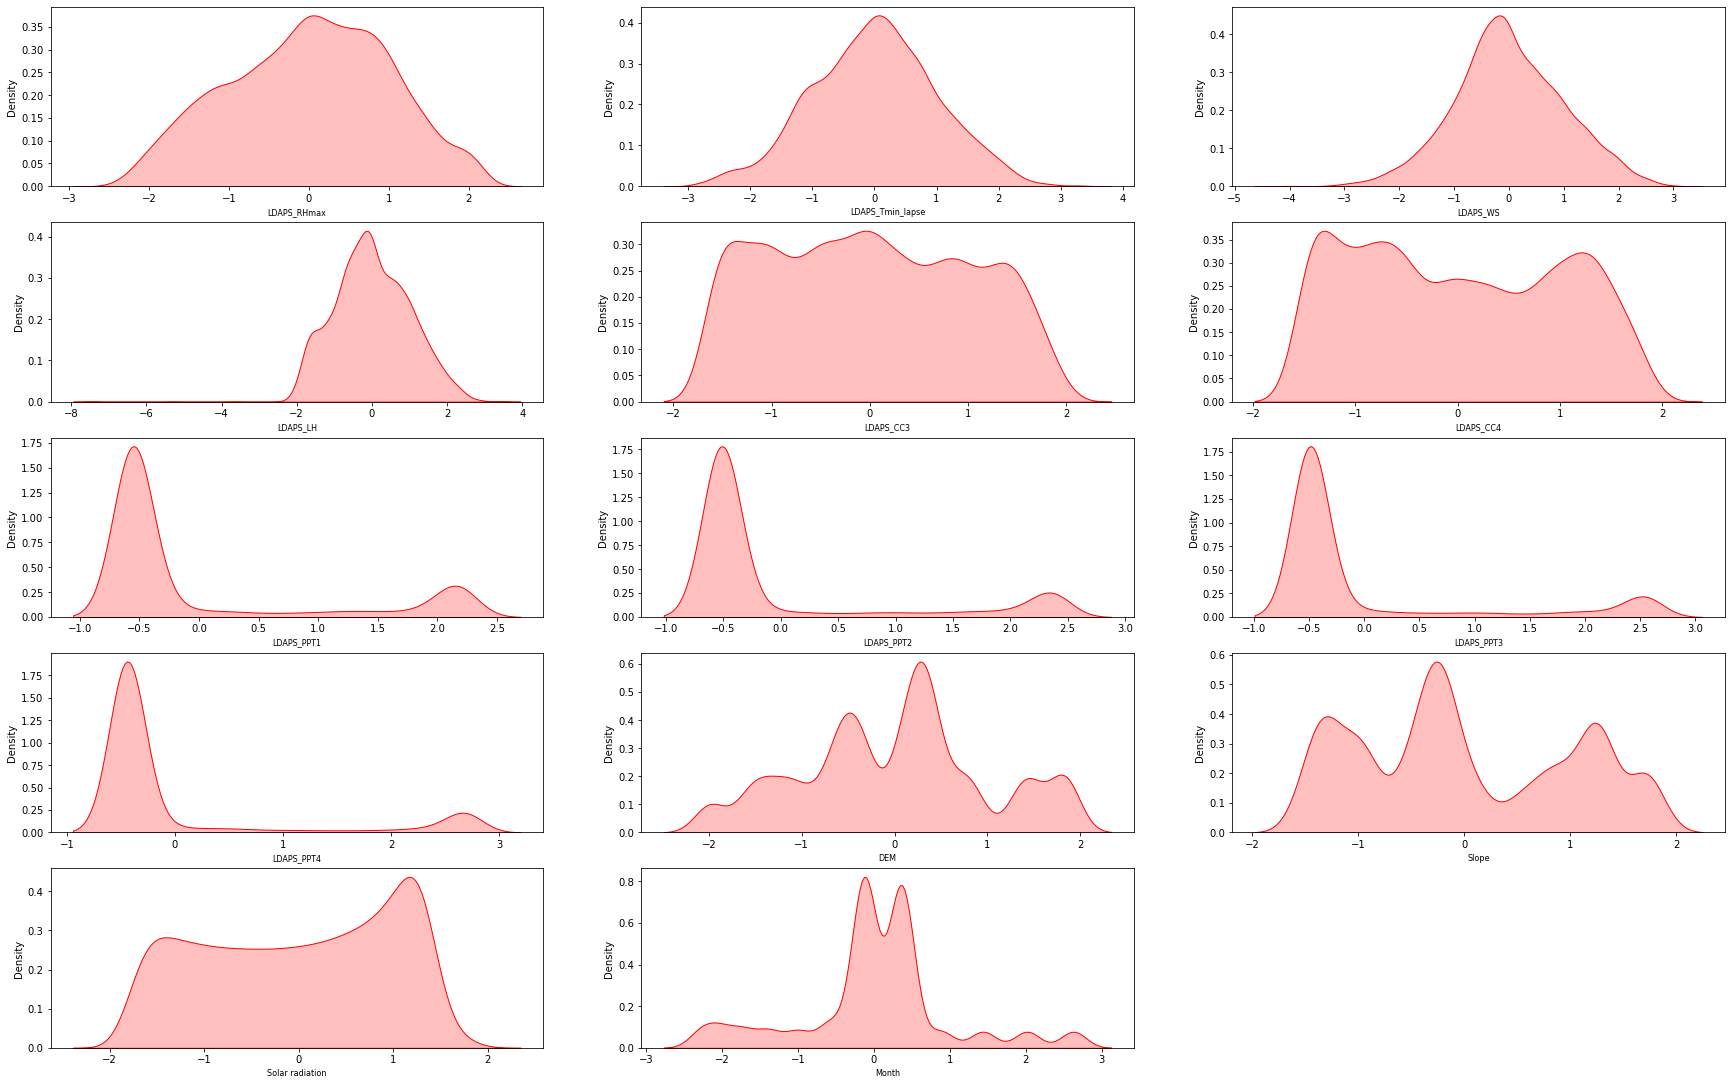

In [165]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

Skewness has been reduced in most of the columns.

# Scaling the data using MinMax scaler:

In [166]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [167]:
mms=MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

I have scaled my data using MinMax scaler since i haven't removed outliers and skewness completely from the dataset.

# Using VIF to remove multicolinearity:

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.535428           station
1      34.326786      Present_Tmax
2      87.573461      Present_Tmin
3      46.304937       LDAPS_RHmin
4      18.931767       LDAPS_RHmax
5      91.235502  LDAPS_Tmax_lapse
6      65.391863  LDAPS_Tmin_lapse
7      20.706292          LDAPS_WS
8      64.171809          LDAPS_LH
9      15.196003         LDAPS_CC1
10     17.615526         LDAPS_CC2
11     17.715480         LDAPS_CC3
12      9.750436         LDAPS_CC4
13      3.402685        LDAPS_PPT1
14      3.045746        LDAPS_PPT2
15      2.219612        LDAPS_PPT3
16      2.168578        LDAPS_PPT4
17      5.315337               lat
18      6.528075               lon
19     16.080959               DEM
20      9.118733             Slope
21      6.915744   Solar radiation
22    135.561528         Next_Tmin
23      3.311545              Year
24      6.480595             Month
25      2.759378               Day

In [169]:
#Droping highly VIF columns
X = X.drop(["Next_Tmin"],axis=1)

In [170]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.534770           station
1      33.775211      Present_Tmax
2      77.650831      Present_Tmin
3      44.961529       LDAPS_RHmin
4      18.750713       LDAPS_RHmax
5      85.634326  LDAPS_Tmax_lapse
6      53.842800  LDAPS_Tmin_lapse
7      20.441734          LDAPS_WS
8      64.094992          LDAPS_LH
9      15.191476         LDAPS_CC1
10     17.566295         LDAPS_CC2
11     17.713725         LDAPS_CC3
12      9.747085         LDAPS_CC4
13      3.362391        LDAPS_PPT1
14      2.999477        LDAPS_PPT2
15      2.218487        LDAPS_PPT3
16      2.149065        LDAPS_PPT4
17      5.289129               lat
18      6.527763               lon
19     15.627247               DEM
20      9.046003             Slope
21      6.906540   Solar radiation
22      3.311293              Year
23      6.479793             Month
24      2.727148               Day

In [171]:
#Droping highly VIF columns
X = X.drop(["LDAPS_Tmax_lapse"],axis=1)

In [172]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.448455           station
1      33.514842      Present_Tmax
2      74.270762      Present_Tmin
3      32.144165       LDAPS_RHmin
4      18.587646       LDAPS_RHmax
5      29.540906  LDAPS_Tmin_lapse
6      20.406185          LDAPS_WS
7      50.196246          LDAPS_LH
8      15.077095         LDAPS_CC1
9      17.526319         LDAPS_CC2
10     17.713675         LDAPS_CC3
11      9.733439         LDAPS_CC4
12      3.360559        LDAPS_PPT1
13      2.996853        LDAPS_PPT2
14      2.217988        LDAPS_PPT3
15      2.147507        LDAPS_PPT4
16      5.203220               lat
17      6.361058               lon
18     15.379647               DEM
19      9.042174             Slope
20      6.248162   Solar radiation
21      3.305969              Year
22      6.386599             Month
23      2.722379               Day

In [173]:
#Droping highly VIF columns
X = X.drop(["Present_Tmin"],axis=1)

In [174]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.422332           station
1      29.139375      Present_Tmax
2      32.124333       LDAPS_RHmin
3      18.146943       LDAPS_RHmax
4      20.074250  LDAPS_Tmin_lapse
5      19.820954          LDAPS_WS
6      48.036006          LDAPS_LH
7      14.853205         LDAPS_CC1
8      17.525836         LDAPS_CC2
9      17.701459         LDAPS_CC3
10      9.705928         LDAPS_CC4
11      3.360148        LDAPS_PPT1
12      2.995289        LDAPS_PPT2
13      2.217655        LDAPS_PPT3
14      2.121379        LDAPS_PPT4
15      5.194726               lat
16      6.341256               lon
17     15.137009               DEM
18      9.017804             Slope
19      6.238629   Solar radiation
20      3.277540              Year
21      6.346213             Month
22      2.704444               Day

In [175]:
#Droping highly VIF columns
X = X.drop(["LDAPS_LH"],axis=1)

In [176]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.357750           station
1      22.420439      Present_Tmax
2      31.898138       LDAPS_RHmin
3      15.012201       LDAPS_RHmax
4      19.565808  LDAPS_Tmin_lapse
5      17.942441          LDAPS_WS
6      14.506970         LDAPS_CC1
7      16.963098         LDAPS_CC2
8      17.584827         LDAPS_CC3
9       9.659758         LDAPS_CC4
10      3.305293        LDAPS_PPT1
11      2.970020        LDAPS_PPT2
12      2.214418        LDAPS_PPT3
13      2.120970        LDAPS_PPT4
14      5.174757               lat
15      6.210232               lon
16     14.933798               DEM
17      8.915949             Slope
18      6.152842   Solar radiation
19      3.132529              Year
20      6.194894             Month
21      2.587080               Day

In [177]:
#Droping highly VIF columns
X = X.drop(["LDAPS_RHmin"],axis=1)

In [178]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.353489           station
1      21.959436      Present_Tmax
2      10.499716       LDAPS_RHmax
3      17.943622  LDAPS_Tmin_lapse
4      17.494162          LDAPS_WS
5      14.424490         LDAPS_CC1
6      15.972219         LDAPS_CC2
7      15.747872         LDAPS_CC3
8       9.644795         LDAPS_CC4
9       3.300489        LDAPS_PPT1
10      2.957410        LDAPS_PPT2
11      2.200888        LDAPS_PPT3
12      2.109838        LDAPS_PPT4
13      5.165206               lat
14      6.026201               lon
15     14.931089               DEM
16      8.900560             Slope
17      6.098402   Solar radiation
18      3.116745              Year
19      6.155191             Month
20      2.586070               Day

In [179]:
#Droping highly VIF columns
X = X.drop(["Present_Tmax"],axis=1)

In [180]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.249027           station
1      10.494177       LDAPS_RHmax
2       8.455903  LDAPS_Tmin_lapse
3      16.864879          LDAPS_WS
4      13.559921         LDAPS_CC1
5      15.963881         LDAPS_CC2
6      15.656609         LDAPS_CC3
7       9.638630         LDAPS_CC4
8       3.270818        LDAPS_PPT1
9       2.956593        LDAPS_PPT2
10      2.200590        LDAPS_PPT3
11      2.106785        LDAPS_PPT4
12      5.125603               lat
13      5.961324               lon
14     14.917218               DEM
15      8.899236             Slope
16      6.092484   Solar radiation
17      3.085602              Year
18      6.044414             Month
19      2.584583               Day

In [181]:
#Droping highly VIF columns
X = X.drop(["LDAPS_WS"],axis=1)

In [182]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       3.968764           station
1      10.436610       LDAPS_RHmax
2       7.862778  LDAPS_Tmin_lapse
3      13.491842         LDAPS_CC1
4      15.963879         LDAPS_CC2
5      15.636448         LDAPS_CC3
6       9.616443         LDAPS_CC4
7       3.269027        LDAPS_PPT1
8       2.955624        LDAPS_PPT2
9       2.200587        LDAPS_PPT3
10      2.054369        LDAPS_PPT4
11      5.014134               lat
12      5.959708               lon
13     14.070241               DEM
14      8.881556             Slope
15      5.654907   Solar radiation
16      3.085455              Year
17      5.846789             Month
18      2.501327               Day

In [183]:
#Droping highly VIF columns
X = X.drop(["LDAPS_CC2"],axis=1)

In [184]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       3.968088           station
1      10.275045       LDAPS_RHmax
2       7.779405  LDAPS_Tmin_lapse
3       9.312590         LDAPS_CC1
4      12.846864         LDAPS_CC3
5       9.616340         LDAPS_CC4
6       3.072742        LDAPS_PPT1
7       2.322113        LDAPS_PPT2
8       2.199760        LDAPS_PPT3
9       2.027317        LDAPS_PPT4
10      5.009534               lat
11      5.958824               lon
12     14.068356               DEM
13      8.878781             Slope
14      5.639854   Solar radiation
15      3.052269              Year
16      5.813819             Month
17      2.498073               Day

In [185]:
#Droping highly VIF columns
X = X.drop(["DEM"],axis=1)

In [186]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       3.680109           station
1      10.128386       LDAPS_RHmax
2       7.716922  LDAPS_Tmin_lapse
3       9.311825         LDAPS_CC1
4      12.843669         LDAPS_CC3
5       9.614301         LDAPS_CC4
6       3.068458        LDAPS_PPT1
7       2.318813        LDAPS_PPT2
8       2.199743        LDAPS_PPT3
9       2.027274        LDAPS_PPT4
10      4.878741               lat
11      5.562414               lon
12      3.429893             Slope
13      5.458327   Solar radiation
14      3.039257              Year
15      5.688665             Month
16      2.458379               Day

In [187]:
#Droping highly VIF columns
X = X.drop(["LDAPS_CC3"],axis=1)

In [188]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       3.680031           station
1      10.128315       LDAPS_RHmax
2       7.687641  LDAPS_Tmin_lapse
3       8.363750         LDAPS_CC1
4       5.068478         LDAPS_CC4
5       2.973010        LDAPS_PPT1
6       2.303686        LDAPS_PPT2
7       1.977942        LDAPS_PPT3
8       2.015596        LDAPS_PPT4
9       4.878332               lat
10      5.551167               lon
11      3.427885             Slope
12      5.458317   Solar radiation
13      3.012093              Year
14      5.686360             Month
15      2.458372               Day

In [189]:
#Droping highly VIF columns
X = X.drop(["LDAPS_RHmax"],axis=1)

In [190]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       3.680020           station
1       7.637569  LDAPS_Tmin_lapse
2       7.980586         LDAPS_CC1
3       5.057435         LDAPS_CC4
4       2.931576        LDAPS_PPT1
5       2.282662        LDAPS_PPT2
6       1.967399        LDAPS_PPT3
7       2.010568        LDAPS_PPT4
8       4.437019               lat
9       5.551137               lon
10      3.129625             Slope
11      5.149676   Solar radiation
12      3.003833              Year
13      5.473596             Month
14      2.410375               Day

Now the multicolinearity issue has been solved.All the VIF values are below 10 it is acceptable.

# Finding Best Random State and Accuracy:

In [191]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [192]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9140034694615482  on Random_state  110


I got the best accuracy and random state.

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:


In [194]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [195]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9141855750956224
mean_squared_error: 0.8557178036100996
mean_absolute_error: 0.6920587405076148
root_mean_squared_error: 0.9250501627534042


# ii) XGB Regressor:

In [196]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9187209266901605
mean_squared_error: 0.8104925269808818
mean_absolute_error: 0.685322103945747
root_mean_squared_error: 0.9002735845179963


# iii) ExtraTreeRegressor:

In [197]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.921617884753471
mean_squared_error: 0.7816048592740955
mean_absolute_error: 0.650629907309241
root_mean_squared_error: 0.8840841924127449


# iv) Gradient Boosting:

In [198]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8077644787579724
mean_squared_error: 1.9169196576959047
mean_absolute_error: 1.0748142064328838
root_mean_squared_error: 1.3845286770940877


# v) DecisionTreeRegressor:

In [199]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8204347283214677
mean_squared_error: 1.7905754196526233
mean_absolute_error: 0.9525471453973237
root_mean_squared_error: 1.3381238431672247


# vi) KNN:

In [200]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7494623285125153
mean_squared_error: 2.4982926379306485
mean_absolute_error: 1.1904038935127599
root_mean_squared_error: 1.580598822576636


# Cross validation score:


In [201]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.9072176058150395


In [202]:
print(cross_val_score(XGB,X,y,cv=5).mean())

0.9141558796932392


In [203]:
print(cross_val_score(ETR,X,y,cv=5).mean())

0.9159189776618499


In [204]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.7981036570343829


In [205]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.7943259739074777


In [206]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7640443430079393


Above are the cross validation scores of RFR,XGB,ETR,GBR,DTR and KNN.

Difference between the model accuracy and cross validation score are:
- RFR - 0.93%
- XGB - 0.53%
- ETR - 0.88%
- GBR - 2.02%
- DTR - 2.31%
- KNN - 1.38%

By looking into the difference of model accuracy and cross validation score i got least difference for XGB.So XGB is my best model.And i have to tune it to get better accuracy.

# Hyper parameter tuning:

In [207]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [208]:
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [4,6,8,10],
              'n_jobs':[-2,-1,1]}

Giving XGB parameters.

In [209]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

Running grid search CV for XGB.

In [210]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

Tunning the model using GCV.

In [211]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 1000, 'n_jobs': -2}

Got the best parameters for XGB.

In [212]:
Best_mod=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=1000,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 92.27521774831997
mean_squared_error: 0.7702940046664237
mean_absolute_error: 0.6638988331470336
RMSE value: 0.8776639474573532


This is my model after tuning.I got 92.51% as r2_score which is gooddd!!!!

# Saving the model:

In [213]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Next_Tmax.pkl")

['Next_Tmax.pkl']

I have saved my model as Next_Tmax.Using .pkl

# Predictions for Next_Tmax:

In [214]:
# Loading the saved model
model=joblib.load("Next_Tmax.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([31.580202, 27.49468 , 30.710146, ..., 33.04203 , 31.187729,
       29.980324], dtype=float32)

In [215]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0         1          2          3         4         5     \
Predicted  31.580202  27.49468  30.710146  30.035769  32.78701  32.13805   
Actual     33.000000  28.00000  31.700000  29.500000  32.70000  33.40000   

                6          7         8          9          10         11    \
Predicted  32.642487  25.852947  34.63303  29.577717  32.196106  29.049023   
Actual     32.700000  25.100000  35.80000  29.900000  31.600000  27.900000   

                12         13         14         15         16         17    \
Predicted  29.597826  33.283215  25.964207  31.752108  30.495085  27.264606   
Actual     29.400000  34.800000  25.800000  32.700000  30.700000  28.900000   

               18         19         20         21         22         23    \
Predicted  29.48329  28.706276  32.849815  32.125656  29.333216  31.733332   
Actual     29.30000  29.300000  32.800000  32.800000  29.000000  32.500000   

                24         25         26       27         28         29    \
Predicted  27.243856  32.203194  30.613375  33.2267  26.376459  34.776054   
Actual     28.400000  32.900000  30.500000  33.1000  25.500000  35.600000   

                30         31         32         33         34         35    \
Predicted  31.681135  29.222643  31.457651  26.315014  30.416914  27.560659   
Actual     31.800000  28.800000  33.800000  30.274887  30.100000  27.500000   

                36         37         38         39         40         41    \
Predicted  33.828152  29.456104  25.951706  27.176872  29.870083  24.559328   
Actual     34.700000  28.600000  26.300000  27.200000  28.900000  24.600000   

                42         43         44         45         46         47    \
Predicted  31.112541  31.383572  33.598923  33.470234  32.128517  25.356852   
Actual     31.300000  31.200000  34.400000  32.500000  32.600000  24.100000   

                48         49         50         51         52         53    \
Predicted  20.632032  32.321644  31.582952  35.291832  34.648621  30.259283   
Actual     20.800000  32.600000  31.500000  34.100000  34.300000  29.500000   

                54        55         56         57         58         59    \
Predicted  32.890392  26.64333  32.670666  35.702118  26.548336  30.299938   
Actual     31.400000  25.40000  32.400000  36.500000  24.900000  30.400000   

                60         61         62         63         64         65    \
Predicted  32.605312  31.938618  31.280447  26.398794  27.616871  31.302643   
Actual     32.400000  32.100000  31.200000  25.600000  28.600000  30.800000   

                66         67         68        69         70         71    \
Predicted  30.644129  32.242123  26.726471  27.98394  35.412048  30.852676   
Actual     30.800000  32.400000  27.500000  29.30000  34.400000  29.900000   

                72         73         74        75         76         77    \
Predicted  31.545132  32.185909  28.189634  32.00885  32.241512  34.155643   
Actual     32.600000  32.300000  28.200000  33.20000  32.100000  33.400000   

                78         79        80         81        82         83    \
Predicted  26.960991  30.153254  30.38349  33.081951  28.21084  30.612114   
Actual     27.100000  31.700000  31.00000  32.400000  29.10000  32.000000   

                84         85         86         87         88         89    \
Predicted  31.910034  31.186514  32.557728  26.279646  31.297644  30.983517   
Actual     31.600000  30.000000  31.500000  26.500000  31.100000  30.300000   

                90         91         92        93         94         95    \
Predicted  32.160629  33.356998  27.992105  28.72855  28.804853  27.031498   
Actual     32.600000  34.300000  28.000000  28.60000  27.300000  28.200000   

                96        97         98         99         100        101   \
Predicted  31.840132  28.64031  26.221781  28.015638  30.823635  29.672716   
Actual     32.500000  28.60000  30.274887  26.600000  29.900000  29.800000   

            

Above are the predicted values and the actual values.They are almost similar.

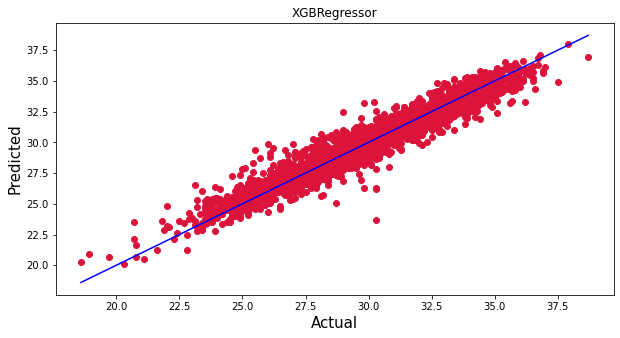

In [216]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# ii) Prediction and model building for target Next_Tmin:

Now let me consider Next_Tmin as target and build the model.

# Separating features and label:

In [217]:
x_1 = df.drop("Next_Tmin",axis=1)
y_1 = df["Next_Tmin"]

Assigned y_1 as target variable and x_1 as remaining features.

# Bar plot for correlations of Next_Tmin column with other features:

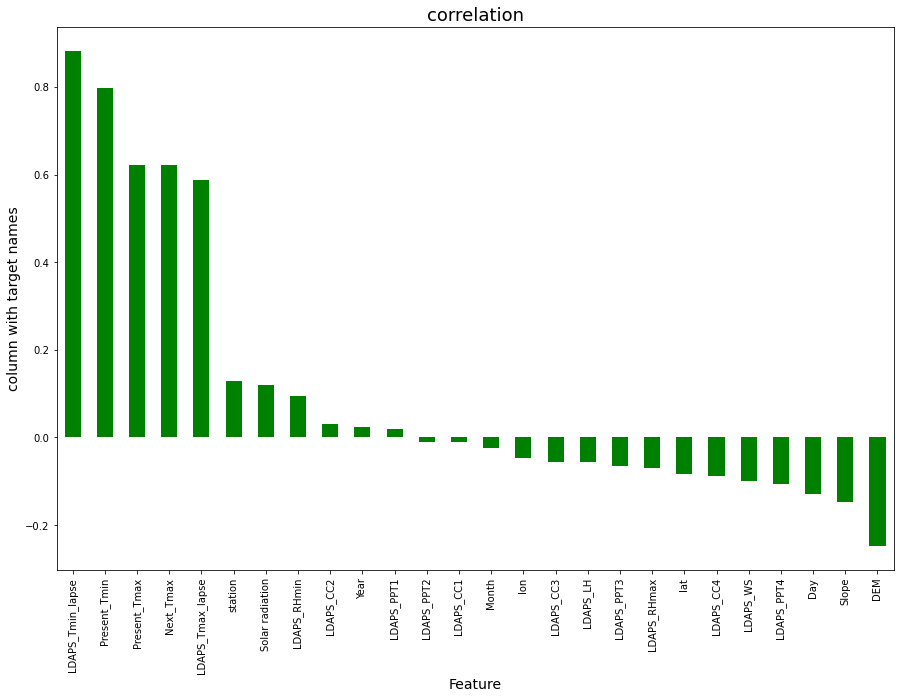

In [218]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

lon and Solar radiation has very less correlation with target Next_Tmax.

# Checking skewness:

In [219]:
#Checking for skewness
x_1.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

The skewed columns are:

- LDAPS_RHmax
- LDAPS_Tmin_lapse
- LDAPS_WS
- LDAPS_LH
- LDAPS_CC3
- LDAPS_CC4
- LDAPS_PPT1
- LDAPS_PPT2
- LDAPS_PPT3
- LDAPS_PPT4
- DEM
- Slope
- Solar radiation
- Month

# Removing skewness using yeo-johnson:

In [220]:
#list of skewed features
skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

Taking all the columns with skewness as a list with variable skew_fea.

In [221]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [222]:
#Removing skewness using yeo-johnson
x_1[skew_fea] = scaler.fit_transform(x_1[skew_fea].values)

Using yeo-johnson i have removed the skewness.

In [223]:
#Checking skewness after removing skewness
x_1[skew_fea].skew()

LDAPS_RHmax        -0.116481
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Month               0.043780
dtype: float64

The skewness has been reduced in all the columns.

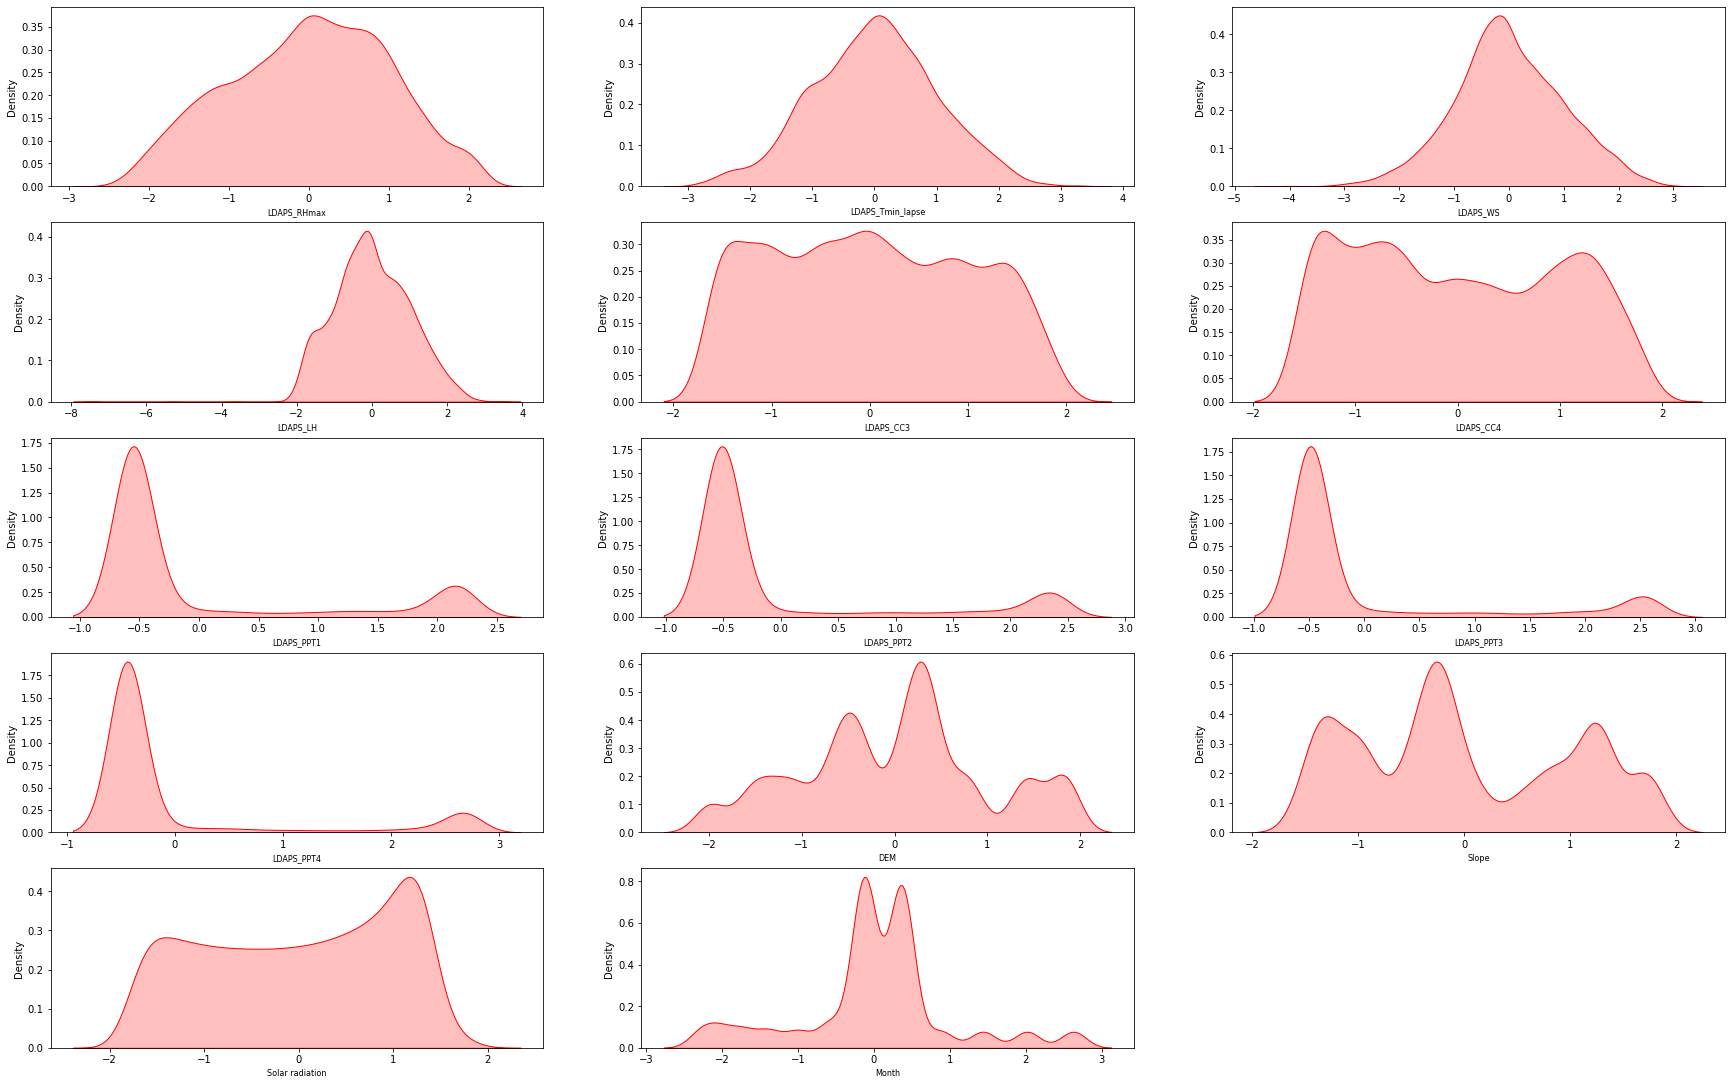

In [224]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x_1[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x_1[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

Skewness has been reduced in most of the columns.

# Scaling the data using MinMax scaler:

In [225]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [226]:
mms=MinMaxScaler()
X_1 = pd.DataFrame(mms.fit_transform(x_1), columns=x_1.columns)

I have scaled my data using MinMax scaler since i haven't removed outliers and skewness completely from the dataset.

# Using VIF to remove multicolinearity:

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.598736           station
1      35.154944      Present_Tmax
2      78.080026      Present_Tmin
3      45.986393       LDAPS_RHmin
4      18.751390       LDAPS_RHmax
5     120.720771  LDAPS_Tmax_lapse
6      53.866135  LDAPS_Tmin_lapse
7      20.862029          LDAPS_WS
8      65.951880          LDAPS_LH
9      15.227578         LDAPS_CC1
10     17.568605         LDAPS_CC2
11     17.747595         LDAPS_CC3
12      9.912304         LDAPS_CC4
13      3.376879        LDAPS_PPT1
14      3.003110        LDAPS_PPT2
15      2.226095        LDAPS_PPT3
16      2.150201        LDAPS_PPT4
17      5.291121               lat
18      6.560031               lon
19     15.630323               DEM
20      9.046003             Slope
21      6.910077   Solar radiation
22     76.275102         Next_Tmax
23      3.328913              Year
24      6.487337             Month
25      2.736512               Day

In [228]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_Tmax_lapse"],axis=1)

In [229]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.586394           station
1      34.024946      Present_Tmax
2      76.651388      Present_Tmin
3      33.305068       LDAPS_RHmin
4      18.645062       LDAPS_RHmax
5      35.936728  LDAPS_Tmin_lapse
6      20.603654          LDAPS_WS
7      60.166409          LDAPS_LH
8      15.194305         LDAPS_CC1
9      17.548304         LDAPS_CC2
10     17.738895         LDAPS_CC3
11      9.811484         LDAPS_CC4
12      3.366689        LDAPS_PPT1
13      3.002997        LDAPS_PPT2
14      2.221762        LDAPS_PPT3
15      2.149974        LDAPS_PPT4
16      5.217723               lat
17      6.365795               lon
18     15.478855               DEM
19      9.043302             Slope
20      6.485846   Solar radiation
21     54.106405         Next_Tmax
22      3.328811              Year
23      6.394958             Month
24      2.736476               Day

In [230]:
#Droping highly VIF columns
X_1 = X_1.drop(["Present_Tmin"],axis=1)

In [231]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.577625           station
1      30.287860      Present_Tmax
2      33.197151       LDAPS_RHmin
3      18.271453       LDAPS_RHmax
4      29.265116  LDAPS_Tmin_lapse
5      19.912521          LDAPS_WS
6      59.373761          LDAPS_LH
7      14.917525         LDAPS_CC1
8      17.546022         LDAPS_CC2
9      17.732365         LDAPS_CC3
10      9.766328         LDAPS_CC4
11      3.366651        LDAPS_PPT1
12      3.002365        LDAPS_PPT2
13      2.220932        LDAPS_PPT3
14      2.121795        LDAPS_PPT4
15      5.205191               lat
16      6.349821               lon
17     15.186842               DEM
18      9.017835             Slope
19      6.452711   Solar radiation
20     52.425978         Next_Tmax
21      3.309397              Year
22      6.361942             Month
23      2.724177               Day

In [232]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_LH"],axis=1)

In [233]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.574447           station
1      26.816344      Present_Tmax
2      32.422043       LDAPS_RHmin
3      16.202650       LDAPS_RHmax
4      25.399373  LDAPS_Tmin_lapse
5      18.049204          LDAPS_WS
6      14.507811         LDAPS_CC1
7      17.170673         LDAPS_CC2
8      17.679300         LDAPS_CC3
9       9.675928         LDAPS_CC4
10      3.335877        LDAPS_PPT1
11      2.991082        LDAPS_PPT2
12      2.215127        LDAPS_PPT3
13      2.121060        LDAPS_PPT4
14      5.198401               lat
15      6.268516               lon
16     15.092027               DEM
17      8.936817             Slope
18      6.448958   Solar radiation
19     42.414942         Next_Tmax
20      3.239424              Year
21      6.274865             Month
22      2.663286               Day

In [234]:
#Droping highly VIF columns
X_1 = X_1.drop(["Next_Tmax"],axis=1)

In [235]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.357750           station
1      22.420439      Present_Tmax
2      31.898138       LDAPS_RHmin
3      15.012201       LDAPS_RHmax
4      19.565808  LDAPS_Tmin_lapse
5      17.942441          LDAPS_WS
6      14.506970         LDAPS_CC1
7      16.963098         LDAPS_CC2
8      17.584827         LDAPS_CC3
9       9.659758         LDAPS_CC4
10      3.305293        LDAPS_PPT1
11      2.970020        LDAPS_PPT2
12      2.214418        LDAPS_PPT3
13      2.120970        LDAPS_PPT4
14      5.174757               lat
15      6.210232               lon
16     14.933798               DEM
17      8.915949             Slope
18      6.152842   Solar radiation
19      3.132529              Year
20      6.194894             Month
21      2.587080               Day

In [236]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_RHmin"],axis=1)

In [237]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.353489           station
1      21.959436      Present_Tmax
2      10.499716       LDAPS_RHmax
3      17.943622  LDAPS_Tmin_lapse
4      17.494162          LDAPS_WS
5      14.424490         LDAPS_CC1
6      15.972219         LDAPS_CC2
7      15.747872         LDAPS_CC3
8       9.644795         LDAPS_CC4
9       3.300489        LDAPS_PPT1
10      2.957410        LDAPS_PPT2
11      2.200888        LDAPS_PPT3
12      2.109838        LDAPS_PPT4
13      5.165206               lat
14      6.026201               lon
15     14.931089               DEM
16      8.900560             Slope
17      6.098402   Solar radiation
18      3.116745              Year
19      6.155191             Month
20      2.586070               Day

In [238]:
#Droping highly VIF columns
X_1 = X_1.drop(["Present_Tmax"],axis=1)

In [239]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.249027           station
1      10.494177       LDAPS_RHmax
2       8.455903  LDAPS_Tmin_lapse
3      16.864879          LDAPS_WS
4      13.559921         LDAPS_CC1
5      15.963881         LDAPS_CC2
6      15.656609         LDAPS_CC3
7       9.638630         LDAPS_CC4
8       3.270818        LDAPS_PPT1
9       2.956593        LDAPS_PPT2
10      2.200590        LDAPS_PPT3
11      2.106785        LDAPS_PPT4
12      5.125603               lat
13      5.961324               lon
14     14.917218               DEM
15      8.899236             Slope
16      6.092484   Solar radiation
17      3.085602              Year
18      6.044414             Month
19      2.584583               Day

In [240]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_WS"],axis=1)

In [241]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       3.968764           station
1      10.436610       LDAPS_RHmax
2       7.862778  LDAPS_Tmin_lapse
3      13.491842         LDAPS_CC1
4      15.963879         LDAPS_CC2
5      15.636448         LDAPS_CC3
6       9.616443         LDAPS_CC4
7       3.269027        LDAPS_PPT1
8       2.955624        LDAPS_PPT2
9       2.200587        LDAPS_PPT3
10      2.054369        LDAPS_PPT4
11      5.014134               lat
12      5.959708               lon
13     14.070241               DEM
14      8.881556             Slope
15      5.654907   Solar radiation
16      3.085455              Year
17      5.846789             Month
18      2.501327               Day

In [242]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_CC2"],axis=1)

In [243]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       3.968088           station
1      10.275045       LDAPS_RHmax
2       7.779405  LDAPS_Tmin_lapse
3       9.312590         LDAPS_CC1
4      12.846864         LDAPS_CC3
5       9.616340         LDAPS_CC4
6       3.072742        LDAPS_PPT1
7       2.322113        LDAPS_PPT2
8       2.199760        LDAPS_PPT3
9       2.027317        LDAPS_PPT4
10      5.009534               lat
11      5.958824               lon
12     14.068356               DEM
13      8.878781             Slope
14      5.639854   Solar radiation
15      3.052269              Year
16      5.813819             Month
17      2.498073               Day

In [244]:
#Droping highly VIF columns
X_1 = X_1.drop(["DEM"],axis=1)

In [245]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       3.680109           station
1      10.128386       LDAPS_RHmax
2       7.716922  LDAPS_Tmin_lapse
3       9.311825         LDAPS_CC1
4      12.843669         LDAPS_CC3
5       9.614301         LDAPS_CC4
6       3.068458        LDAPS_PPT1
7       2.318813        LDAPS_PPT2
8       2.199743        LDAPS_PPT3
9       2.027274        LDAPS_PPT4
10      4.878741               lat
11      5.562414               lon
12      3.429893             Slope
13      5.458327   Solar radiation
14      3.039257              Year
15      5.688665             Month
16      2.458379               Day

In [246]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_CC3"],axis=1)

In [247]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       3.680031           station
1      10.128315       LDAPS_RHmax
2       7.687641  LDAPS_Tmin_lapse
3       8.363750         LDAPS_CC1
4       5.068478         LDAPS_CC4
5       2.973010        LDAPS_PPT1
6       2.303686        LDAPS_PPT2
7       1.977942        LDAPS_PPT3
8       2.015596        LDAPS_PPT4
9       4.878332               lat
10      5.551167               lon
11      3.427885             Slope
12      5.458317   Solar radiation
13      3.012093              Year
14      5.686360             Month
15      2.458372               Day

In [248]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_RHmax"],axis=1)

In [249]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       3.680020           station
1       7.637569  LDAPS_Tmin_lapse
2       7.980586         LDAPS_CC1
3       5.057435         LDAPS_CC4
4       2.931576        LDAPS_PPT1
5       2.282662        LDAPS_PPT2
6       1.967399        LDAPS_PPT3
7       2.010568        LDAPS_PPT4
8       4.437019               lat
9       5.551137               lon
10      3.129625             Slope
11      5.149676   Solar radiation
12      3.003833              Year
13      5.473596             Month
14      2.410375               Day

Now the multicolinearity issue has solved.All the VIF values are below 10 it is acceptable.

# Finding Best Random State and Accuracy:

In [250]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [251]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9016743079147431  on Random_state  173


I got the best accuracy and random state.

In [252]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [253]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [254]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9020475399223495
mean_squared_error: 0.621063888870376
mean_absolute_error: 0.6025181251478294
root_mean_squared_error: 0.7880760679467281


RFR is giving me 89.94% r2_score.

# ii) XGB Regressor:

In [255]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9357664297891843
mean_squared_error: 0.40727053592663964
mean_absolute_error: 0.48009587966602874
root_mean_squared_error: 0.6381775112981024


XGB is giving me 93.82% r2_score.

# iii) ExtraTreeRegressor:

In [256]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9130336869858066
mean_squared_error: 0.5514066366326728
mean_absolute_error: 0.5637736613545479
root_mean_squared_error: 0.7425675973490041


ETR is giving me 91.08% r2_score.

# iv) Gradient Boosting:

In [257]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8871461856104341
mean_squared_error: 0.7155453654055955
mean_absolute_error: 0.65594695950429
root_mean_squared_error: 0.8458991461194387


GBR is giving me 88.82% r2_score.

# v) DecisionTreeRegressor:

In [258]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.777708911280802
mean_squared_error: 1.4094282870663188
mean_absolute_error: 0.8942404728313953
root_mean_squared_error: 1.1871934497234724


DTR is giving me 78.14% r2_score.

# vi) KNN:

In [259]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7724885952405129
mean_squared_error: 1.4425275045698323
mean_absolute_error: 0.9232663644686351
root_mean_squared_error: 1.2010526651940923


KNN is giving me 77.83% r2_score.

# Cross validation score:

In [260]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.9067394776629181


In [261]:
print(cross_val_score(XGB,X,y,cv=5).mean())

0.9141558796932392


In [262]:
print(cross_val_score(ETR,X,y,cv=5).mean())

0.9155828666315238


In [263]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.7981125303495007


In [264]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.7897890582112675


In [265]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7640443430079393


Above are the cross validation scores of RFR,XGB,ETR,GBR,DTR and KNN.

By looking into the difference of model accuracy and cross validation score i got least difference for XGB.So XGB is my best model.And i have to tune it to get better accuracy.

# Hyper parameter tuning:

In [266]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [267]:
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [4,6,8,10],
              'n_jobs':[-2,-1,1]}

Giving XGB parameters.

In [268]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

Running grid search CV for XGB.

In [269]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

Tunning the model using GCV.

In [270]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 4, 'n_estimators': 1000, 'n_jobs': -2}

Got the best parameters for XGB.

In [271]:
Best_mod_1=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=1000,n_jobs=-2)
Best_mod_1.fit(X_train,y_train)
pred=Best_mod_1.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 93.86313460621383
mean_squared_error: 0.38910564205507925
mean_absolute_error: 0.4685903404817184
RMSE value: 0.623783329414212


This is my model after tuning.I got 93.96% as r2_score which is gooddd!!!!

# Saving the model:

In [272]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod_1,"Next_Tmin.pkl")

['Next_Tmin.pkl']

I have saved my model as Next_Tmin.Using .pkl

# Predictions for Next_Tmax:

In [273]:
# Loading the saved model
model_1=joblib.load("Next_Tmin.pkl")

#Prediction
prediction_1 = model_1.predict(X_test)
prediction_1

array([25.265242, 23.839886, 23.11571 , ..., 22.378286, 21.0466  ,
       23.890865], dtype=float32)

In [274]:
pd.DataFrame([model_1.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0          1          2          3          4          5     \
Predicted  25.265242  23.839886  23.115709  21.797426  20.605497  18.731943   
Actual     25.500000  25.400000  23.600000  22.600000  20.100000  18.700000   

                6         7         8          9          10         11    \
Predicted  25.478197  21.62249  17.92873  18.945967  20.281349  24.401264   
Actual     25.900000  23.10000  17.50000  19.000000  20.900000  24.100000   

                12         13         14         15         16         17    \
Predicted  24.725975  21.214087  20.796453  26.667038  22.366793  25.587692   
Actual     23.700000  21.300000  21.300000  27.000000  22.600000  25.300000   

                18         19         20         21         22         23    \
Predicted  22.906227  23.205835  25.599346  21.011005  20.158751  26.114977   
Actual     23.200000  23.200000  25.800000  21.800000  20.400000  26.200000   

                24         25        26        27         28         29    \
Predicted  19.916395  23.187181  20.99942  20.46085  22.553318  23.715605   
Actual     20.200000  22.800000  22.30000  21.20000  23.200000  24.200000   

                30         31         32         33         34         35    \
Predicted  23.524731  24.131224  23.914127  21.725996  20.736437  22.047791   
Actual     23.400000  24.000000  23.500000  21.900000  20.400000  22.100000   

                36         37         38         39         40        41    \
Predicted  23.721951  19.845686  26.903379  24.321287  21.546492  23.11401   
Actual     23.400000  19.700000  27.000000  24.600000  22.000000  23.00000   

                42         43         44       45         46         47    \
Predicted  21.820721  25.326599  25.221251  23.7521  20.144524  24.299896   
Actual     22.900000  25.400000  24.300000  23.8000  20.900000  23.500000   

                48         49         50         51        52         53    \
Predicted  23.827978  25.492672  22.167213  22.072666  26.28215  24.756649   
Actual     23.800000  24.400000  21.900000  23.800000  22.93222  24.600000   

                54         55         56         57         58        59    \
Predicted  23.884932  24.509281  22.622063  19.580244  20.880943  26.40807   
Actual     23.200000  24.000000  22.932220  18.800000  22.000000  27.10000   

                60         61         62        63         64         65    \
Predicted  17.560467  27.668638  21.867172  17.00482  18.799129  26.997227   
Actual     17.900000  27.300000  21.600000  16.40000  18.200000  27.500000   

                66         67         68         69        70         71    \
Predicted  21.934437  24.444111  22.438456  23.644335  23.62965  21.488628   
Actual     23.600000  24.200000  23.400000  23.900000  23.90000  21.700000   

                72         73        74         75         76         77    \
Predicted  22.658468  22.473904  22.96594  23.115971  18.506569  21.178827   
Actual     24.000000  22.400000  22.00000  23.200000  16.700000  20.900000   

                78       79         80         81         82         83    \
Predicted  25.373074  24.3041  24.825659  24.858225  22.882427  24.061216   
Actual     25.700000  25.2000  24.400000  24.200000  21.900000  23.500000   

                84         85         86         87         88        89    \
Predicted  24.687099  22.640114  17.301373  19.130955  21.243135  22.72982   
Actual     24.500000  23.300000  17.600000  19.900000  21.800000  23.10000   

                90         91         92         93         94         95    \
Predicted  25.098076  24.862326  23.372545  24.363691  22.712551  23.021975   
Actual     23.300000  26.100000  24.200000  24.600000  22.200000  22.900000   

                96         97         98         99         100        101   \
Predicted  24.025692  21.365032  23.475819  20.446745  25.975132  22.360781   
Actual     23.700000  21.200000  23.700000  20.200000  25.700000  21.800000   

               

Above are the predicted values and the actual values.They are almost similar.

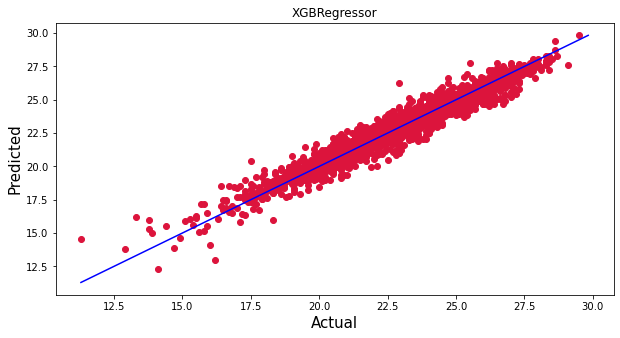

In [275]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction_1, c='crimson')
p1 = max(max(prediction_1), max(y_test))
p2 = min(min(prediction_1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# Conclusion:

- XGBRegressor was my best model for predicting Next_Tmax and the best accuracy for this model was 92.51%.
- XGBRegressor was my best model for predicting Next_Tmin and the best accuracy for this model was 93.96%.

## Done!